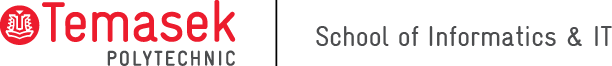
## <center>  Data Science Essentials (CIA2C14)</center>
### <center>  Assignment 2 </center>

### <font color=red>Fill in your personal data below

#### <font color=blue>Name: Timothy Alexander Tirtamaya<font color=black>
#### <font color=blue>Admin No: 2204064F<font color=black>
#### <font color=blue>Class: P01<font color=black> 

### <font color=red> Declaration of Originality

#### "I am the originator of this work and I have appropriately acknowledged all other original sources used as my reference for this work.

#### I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.

#### I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced."

Please sign your name or insert a picture of your signature in the markdown cell below. (double click on the cell)

Timothy Alexander Tirtamaya

#### 1. This deliverable is worth 45% of the final marks for DSES. The total mark is 90. There are two submissions required- Part I and Part II The due dates are  <font color=red>10 Jul and 14 Aug 2023, 09:00 am. 
#### 2. For Part I submission, you need to complete Task 1 Data Preparation and Task 2: Data Understanding.
#### 3. For Part II submission, you need to complete Task 3: Data Modelling and Task 4: Recommendations & Conclusion.
#### 4. Note that you should still keep your codes for Part I for tutor to evaluate Part II. 
#### 5. This is an individual deliverable. You are required to produce your own work.
#### 6. You are allowed to use packages (libraries) not covered in the lecture slides or practicals (e.g. scikit-learn, seaborn, etc.)
#### 7. Apart from using Markdown cells to include your description, take-aways, and comments, provide sufficient comments to your codes too. 
#### 8. Use random_state= Your Admin Number without the letter wherever needed.
>e.g. random_state=2200212
#### 9. Name your notebook according to the following format. 
>e.g. YourName_2200001A_Assignment2
#### 10. You need to submit your deliverable, i.e. this Jupyter Notebook (.ipynb format) for marking.

# <font color= maroon> Project Background & Aims 

After experiencing the lockdown and borders closure, restricting their movement, people have started to rediscover the beauty of their own local areas. This has resulted in a newfound appreciation for local places of interest, and people have been encouraged to explore their own backyards with public transport and find hidden gems they may not have otherwise discovered. One popular mode of transport is cycling. Ohaiyo Pte Ltd is a bicycle rental company in Japan seeking to expand their business such as purchasing more bicycles, have more outlets or hire more manpower. Such major decision needs to be backed up by data-driven evidence. Fortunately, Ohaiyo has collected data of past bicycle rentals. As a start, they would like to find out what are the factors that would affect the demands

# <font color= maroon>  Data Preparation 

Data Cleaning
1. Missing Values
2. Inconsistent Data
3. Duplicate Rows
4. Anomalies

Data Transformation
1. New Columns
2. Binning
3. One-hot Encoder

## <font color= grey> Data Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import zscore

df=pd.read_csv("Assignment2_Dataset.csv", encoding='cp1252', parse_dates=['Date'], dayfirst=False)

Provide the description, justification and results of your technique(s) here.

### 1) Dealing with Missing Values

In [2]:
#Finds the number of missing values in all the columns of the data set.
df_missing=pd.DataFrame(df.isna().sum())
df_missing

,0
S/N,0
Date,0
Country,0
Rented_Bike_Count,12
Hour,24
Temperature,24
Humidity,12
Windspeed,0
Visibility,0
Dewpoint_Temp,0


#### 1.1) Hour

I filled up the missing values in the Hour column by using this code as it analyzes the evident pattern within the column and imputes the calculted result based on the pattern, which makes sense because time keeps passing on, it cannot increase or decrease, it can only follow the pattern.

In [3]:
#Finds the position of the cells with missing values in the Hour column.
missing_hour = df['Hour'].isnull()

#Iterates through the cells with missing values.
for index in df[missing_hour].index:
    #Calculates the expected value based on the pattern in the data set.
    filled_hour = (df.loc[index-1, 'Hour'] + 1) % 24

    #Imputes and fill in the cell, with the missing value, with the calculated result.
    df.loc[index, 'Hour']=filled_hour

In [4]:
#Checks if the missing values in the Hour column has been filled up.
df_missing=pd.DataFrame(df.isna().sum())
df_missing

,0
S/N,0
Date,0
Country,0
Rented_Bike_Count,12
Hour,0
Temperature,24
Humidity,12
Windspeed,0
Visibility,0
Dewpoint_Temp,0


<hr style="border: 2px dashed blue;">

#### 1.2) Rented_Bike_Count

My justification for dropping all rows that has a missing value within its Rented_Bike_Count column is because that it has an anomaly, an extreme value, and if I were to impute the data to fill in the missing value, it will take the anomaly into account and produce an unreliable calculation, furthermore, it may interfere and mess up the machine learning process later on into the project as this is a target column.

In [5]:
#Drops the rows containing any missing value within the Rented_Bike_Count column.
df.dropna(subset=['Rented_Bike_Count'], inplace=True)

In [6]:
#Checks if there are any more missing values in the Rented_Bike_Count column.
df_missing=pd.DataFrame(df.isna().sum())
df_missing

,0
S/N,0
Date,0
Country,0
Rented_Bike_Count,0
Hour,0
Temperature,24
Humidity,12
Windspeed,0
Visibility,0
Dewpoint_Temp,0


<hr style="border: 2px dashed blue;">

#### 1.3) Snowfall

My justification for using forward fill to fill in the missing values for Snowfall was that when we checked the Snowfall column, we found that the pattern for snowfall has no fluctuation and decided to use forward fill as it checks the value before the cell with the missing value and fills in the missing value with the previous value. 

In [7]:
#Checking the pattern of all low snowfall recorded.
df[df['Snowfall']=='low']

,S/N,Date,Country,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Snowfall,Open,Hit_Sales,Region,Latitude,Longitude
0,1,2018-11-23,JP,196.0,0.0,-1.7,79.0,0.5,3,-4.8,0.0,0.0,low,Yes,N,South,37.453024,127.718234
2,3,2018-11-23,JP,161.0,2.0,-1.1,79.0,0.7,3,-4.2,0.0,0.0,low,Yes,N,South,37.276916,127.736311
3,4,2018-11-23,JP,99.0,3.0,-0.6,76.0,0.5,3,-4.3,0.0,0.0,low,Yes,N,South,37.416781,128.262240
4,5,2018-11-23,JP,64.0,4.0,-0.3,76.0,0.9,3,-4.0,0.0,0.0,low,Yes,N,South,37.377350,127.895479
5,6,2018-11-23,JP,76.0,5.0,-0.2,73.0,0.8,3,-4.4,0.0,0.0,low,Yes,N,South,37.862155,128.374512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8759,2019-12-01,JP,1860.0,19.0,15.6,44.0,1.5,3,3.3,0.0,0.0,low,Yes,Y,South,37.858219,128.236174
8759,8760,2019-12-01,JP,1593.0,20.0,14.5,51.0,1.4,3,4.4,0.0,0.0,low,Yes,Y,South,37.088738,127.732059
8760,8761,2019-12-01,JP,1513.0,21.0,13.4,56.0,0.7,3,4.7,0.0,0.0,low,Yes,Y,South,37.623679,128.075040
8761,8762,2019-12-01,JP,1360.0,22.0,12.7,60.0,0.0,2,5.1,0.0,0.0,low,Yes,Y,South,37.641870,128.197566


In [8]:
#Checking the pattern of all 'very heavy' snowfall recorded.
df[df['Snowfall']=='very heavy']

,S/N,Date,Country,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Snowfall,Open,Hit_Sales,Region,Latitude,Longitude
8581,8582,2019-11-24,JP,62.0,10.0,0.4,97.0,1.8,2,0.0,0.00,0.0,very heavy,Yes,N,South,37.695712,128.404745
8582,8583,2019-11-24,JP,114.0,11.0,1.2,97.0,2.3,3,0.7,0.07,0.0,very heavy,Yes,N,South,37.753102,127.675988


In [9]:
#Forward fills missing values in the snowfall column.
df['Snowfall'] = df['Snowfall'].fillna(method='ffill')

#Verifies the changes and count the number of missing values.
print(df['Snowfall'].isnull().sum())

0


<hr style="border: 2px dashed blue;">

#### 1.4) Humidity

I filled up the missing values in the Humidity column using an advanced imputation technique called 'KNN', because KNN analyzes the data around the cell of the missing value, calculates, predicts and imputed the predicted value into the cell of the missing value. This is because the humidity has fluctuations and in order to predict the most accurate value to fill in the missing value with, we had to take the fluctuative pattern into account.

In [10]:
#Checks which rows have a missing value in their Humidity column.
df[df['Humidity'].isnull()]

,S/N,Date,Country,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Snowfall,Open,Hit_Sales,Region,Latitude,Longitude
42,43,2018-12-01,JP,862.0,18.0,0.6,NaN,1.4,5,-5.0,0.00,0.0,low,Yes,N,South,37.573466,127.865169
205,206,2018-12-08,JP,354.0,13.0,-1.7,NaN,1.8,4,-17.8,1.22,0.0,low,Yes,N,South,37.110321,127.721858
258,259,2018-12-10,JP,210.0,18.0,2.0,NaN,3.0,5,-4.7,0.00,0.0,low,Yes,N,South,37.465955,128.290930
399,400,2018-12-16,JP,291.0,15.0,-3.3,NaN,5.0,5,-22.0,0.86,0.0,low,Yes,N,South,37.617748,128.248592
534,535,2018-12-22,JP,63.0,6.0,5.1,NaN,1.3,2,2.1,0.00,0.0,low,Yes,N,South,37.315638,128.433990
677,678,2018-12-28,JP,61.0,5.0,-5.7,NaN,1.2,5,-21.3,0.00,0.0,low,Yes,N,South,37.862687,128.258576
1200,1201,2019-01-19,JP,211.0,0.0,0.3,NaN,1.8,3,-10.2,0.00,0.0,low,Yes,N,South,37.881875,127.839417
2970,2971,2019-04-03,JP,1436.0,17.0,19.7,NaN,2.6,4,10.9,0.54,0.0,low,Yes,Y,South,37.256233,127.513146
3544,3545,2019-04-27,JP,1115.0,14.0,22.2,NaN,2.8,3,4.7,2.91,0.0,low,Yes,Y,South,37.656032,128.368898
3953,3954,2019-05-14,JP,1171.0,15.0,24.0,NaN,1.6,2,15.4,2.24,0.0,low,Yes,Y,South,37.981316,128.181491


In [11]:
from sklearn.impute import KNNImputer

#Impute data and fill in the missing values with KNN.
imputer = KNNImputer(n_neighbors=5)

#Perform the imputation on the 'Humidity' column.
df['Humidity'] = imputer.fit_transform(df[['Humidity']])

#rounds up all values to 1 decimal place.
df['Humidity'] = df['Humidity'].round(1)

In [12]:
#Verify the changes and count the number of missing values.
print(df['Humidity'].isnull().sum())

0


In [13]:
#Finds the remaining number of missing values in all of the columns of the data set.
df_missing=pd.DataFrame(df.isna().sum())
df_missing

,0
S/N,0
Date,0
Country,0
Rented_Bike_Count,0
Hour,0
Temperature,24
Humidity,0
Windspeed,0
Visibility,0
Dewpoint_Temp,0


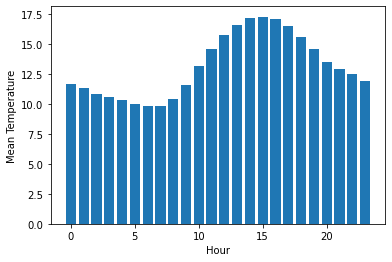

In [14]:
#Codes to check the colleration and pattern of temperatures by hours.
df_mean = df.groupby('Hour')['Temperature'].mean()

plt.bar(x=df_mean.index, height=df_mean.values)
plt.xlabel('Hour')
plt.ylabel('Mean Temperature')
plt.show()

In [15]:
#To check the maximum and minimum value of the columns to see if there are any anomalies or outliers.
df.describe()

,S/N,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Latitude,Longitude
count,8751.000000,8751.000000,8751.000000,8727.000000,8751.000000,8751.000000,8751.00000,8751.000000,8751.000000,8751.000000,8751.000000,8751.000000
mean,4383.278482,708.364987,11.504514,13.153925,58.238076,1.725060,3.72506,4.072735,0.569308,0.148086,37.505428,127.996257
std,2530.314490,736.971460,6.921796,13.569528,20.342517,1.036629,1.07046,13.060806,0.868882,1.127358,0.287733,0.290013
min,1.000000,-2.000000,0.000000,-44.500000,0.000000,0.000000,1.00000,-30.600000,0.000000,0.000000,37.000169,127.500077
25%,2191.500000,191.500000,6.000000,3.400000,42.000000,0.900000,3.00000,-4.700000,0.000000,0.000000,37.261768,127.749528
50%,4383.000000,505.000000,12.000000,13.800000,57.000000,1.500000,4.00000,5.100000,0.010000,0.000000,37.506054,127.995876
75%,6574.500000,1066.000000,18.000000,22.600000,74.000000,2.300000,5.00000,14.800000,0.930000,0.000000,37.758777,128.248434
max,8763.000000,34180.000000,23.000000,166.600000,98.000000,7.400000,5.00000,27.200000,3.520000,35.000000,37.999835,128.499946


<hr style="border: 2px dashed blue;">

#### 1.5) Temperature

I filled in the missing value in the Temperature column using interpolation. Interpolation is a techniquw that uses the nearby data to estimate the value to replace the missing value. This is because, like Humidity, Temperature has an irreg

In [16]:
#Finds all the rows with a missing value in their Temperature column.
df[df['Temperature'].isnull()]

,S/N,Date,Country,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Snowfall,Open,Hit_Sales,Region,Latitude,Longitude
8162,8163,2019-11-07,JP,639.0,0.0,NaN,74.0,1.6,2,7.4,0.00,0.0,low,Yes,N,South,37.668788,127.981647
8163,8164,2019-11-07,JP,410.0,1.0,NaN,76.0,1.4,2,7.7,0.00,0.0,low,Yes,N,South,37.419070,127.593193
8164,8165,2019-11-07,JP,136.0,2.0,NaN,81.0,1.3,2,8.8,0.00,0.0,low,Yes,N,South,37.539246,127.759191
8165,8166,2019-11-07,JP,40.0,3.0,NaN,88.0,1.0,1,8.8,0.00,0.5,low,Yes,N,South,37.050736,127.705692
8166,8167,2019-11-07,JP,47.0,4.0,NaN,95.0,0.7,1,9.8,0.00,0.0,low,Yes,N,South,37.935941,128.069457
8167,8168,2019-11-07,JP,71.0,5.0,NaN,95.0,0.2,1,10.3,0.00,0.0,low,Yes,N,South,37.499041,128.450869
8168,8169,2019-11-07,JP,194.0,6.0,NaN,91.0,1.0,1,9.5,0.00,1.0,low,Yes,N,South,37.065338,128.406016
8169,8170,2019-11-07,JP,526.0,7.0,NaN,91.0,1.3,2,9.3,0.00,0.0,low,Yes,N,South,37.212698,127.569581
8170,8171,2019-11-07,JP,1171.0,8.0,NaN,89.0,1.1,2,9.5,0.01,0.0,low,Yes,Y,South,37.735100,128.336964
8171,8172,2019-11-07,JP,740.0,9.0,NaN,86.0,1.0,2,8.9,0.09,0.5,low,Yes,N,South,37.478891,128.247450


In [17]:
#Fills in the missing values of the Temperature column using interpolation.
df['Temperature'] = df['Temperature'].interpolate(axis=0)

In [18]:
#Checks if all of the missing data within the Temperature column has been filled up.
df_missing=pd.DataFrame(df.isna().sum())
df_missing

,0
S/N,0
Date,0
Country,0
Rented_Bike_Count,0
Hour,0
Temperature,0
Humidity,0
Windspeed,0
Visibility,0
Dewpoint_Temp,0


<hr style="border: 2px dashed blue;">

#### 1.6) Hit_Sales

For the missing values in Hit_Sales, I gave a condition where if the Rented_Bike_Count for the row is more than a thousand, fill in the missing value in the Hit_Sales with 'Y', else, fill it in with 'N'. The reason I gave this condition is evident in the pattern or relationship in the dataframe, where if Rented_Bike_Count exceeded 1000, in that row, the Hit_Sales would be Y, and when Rented_Bike_Count was lower than 1000, then Hit_Sales would be N.

In [19]:
#Code sets a condition where if x, Hit_Sales, was more than a thousand, fill in the missing value with 'Y', and if x is lesser than 1000, fill in the missing value with 'N'.
df['Hit_Sales'] = df['Hit_Sales'].fillna(
    df['Rented_Bike_Count'].apply(lambda x: 'Y' if x > 1000 else 'N')
)

In [20]:
#Check and confirms that there are no longer any missing values within the data set.
df_missing=pd.DataFrame(df.isna().sum())
df_missing

,0
S/N,0
Date,0
Country,0
Rented_Bike_Count,0
Hour,0
Temperature,0
Humidity,0
Windspeed,0
Visibility,0
Dewpoint_Temp,0


<hr style="border: 1px solid red;">

### 2) Fixing inconsistent data

I had to fix inconsistent data and other irregularities as it will affect the modelling and plotting sequence when I try to gain insights. So the way I fixed the inconsistencies in the data was when I noticed different inputs for the same meaning such as 'yes ' and 'Y', which are considered two different inputs regardless of meaning, so I had to change them into consistent values. Which is 'Yes' and 'No'.

#### 2.1) Open

In [21]:
#Checks every data that was inputed into the Open column.
df['Open'].unique()

array(['Yes', 'yes ', 'yes', 'Y', 'No', 'n'], dtype=object)

In [22]:
value_map = {
    'yes ': 'Yes',
    'yes': 'Yes',
    'Y': 'Yes',
    'n': 'No'
}

#Uses the mapping dictionary to replace inconsistent values in the Open column.
df['Open'] = df['Open'].replace(value_map)

<hr style="border: 1px solid red;">

### 3) Dealing with duplicate rows

I had to deal with duplicate rows as it could affect the modelling process, and while I understand that in Temperature and other numerical columns there are duplicated values and numbers, but what's wrong is that there are duplicate rows with the same day and hour, which based on the dataframe should not happen as the data is recorded with an interval of 1 hour and time keeps passing and simply cannot be reversed, so I fixed it by getting rid of the second row that was inputed with the same date and hour.

In [23]:
#Code to check if there are any duplicate rows based on the filter of the Date and Hour column.
if df.duplicated(subset=['Date', 'Hour']).any():
    print("Duplicates still exist.")
else:
    print("Duplicates have been dropped.")

Duplicates still exist.


In [24]:
#Code to specify and identify the duplicate and original rows.
duplicate_rows = df[df.duplicated(subset=['Date', 'Hour'], keep=False)]
print("Duplicate Rows:")
duplicate_rows

Duplicate Rows:


,S/N,Date,Country,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Snowfall,Open,Hit_Sales,Region,Latitude,Longitude
788,789,2019-01-01,JP,206.0,20.0,-0.3,40.0,1.2,4,-12.2,0.0,0.0,low,Yes,N,South,37.336522,127.545665
2609,2610,2019-11-11,JP,111.0,5.0,6.8,83.0,0.6,2,4.1,0.0,0.0,low,Yes,N,South,37.062767,127.573926
3532,3533,2019-01-01,JP,206.0,20.0,-0.3,40.0,1.2,4,-12.2,0.0,0.0,low,Yes,N,South,37.411727,128.052198
7155,7156,2019-09-25,JP,881.0,1.0,29.0,67.0,1.1,5,22.2,0.0,0.0,low,Yes,N,South,37.437813,128.147328
8263,8264,2019-11-11,JP,111.0,5.0,6.8,83.0,0.6,2,4.1,0.0,0.0,low,Yes,N,South,37.506379,127.660629
8384,8385,2019-09-25,JP,881.0,1.0,29.0,67.0,1.1,5,22.2,0.0,0.0,low,Yes,N,South,37.488423,128.283696


In [25]:
#Code to drop the duplicate rows and keep the first inputted row based on the filter.
df.drop_duplicates(subset=['Date', 'Hour'], keep='first', inplace=True)

In [26]:
#Code to check if the duplicate rows have been dropped.
if df.duplicated(subset=['Date', 'Hour']).any():
    print("Duplicates still exist.")
else:
    print("Duplicates have been dropped.")

Duplicates have been dropped.


<hr style="border: 1px solid red;">

### 4) Dealing with Anomalies

From my understanding, anomalies are outliers that does not make sense, like negative values in the Rented_Bike_Count column or a temperature of 166 degrees celsius, so I had to delete these anomalies.

In [27]:
#Checking for extreme values.
df.describe()

,S/N,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Latitude,Longitude
count,8748.000000,8748.000000,8748.000000,8748.000000,8748.000000,8748.000000,8748.000000,8748.000000,8748.000000,8748.000000,8748.000000,8748.000000
mean,4382.474623,708.470965,11.505487,13.152721,58.236328,1.725320,3.725080,4.072519,0.569503,0.148137,37.505440,127.996256
std,2530.029941,737.048264,6.921127,13.551277,20.343132,1.036701,1.070394,13.060449,0.868967,1.127548,0.287780,0.290024
min,1.000000,-2.000000,0.000000,-44.500000,0.000000,0.000000,1.000000,-30.600000,0.000000,0.000000,37.000169,127.500077
25%,2190.750000,191.750000,6.000000,3.400000,42.000000,0.900000,3.000000,-4.700000,0.000000,0.000000,37.261756,127.749547
50%,4382.500000,505.500000,12.000000,13.800000,57.000000,1.500000,4.000000,5.100000,0.010000,0.000000,37.506106,127.995858
75%,6573.250000,1066.000000,18.000000,22.600000,74.000000,2.300000,5.000000,14.800000,0.930000,0.000000,37.758917,128.248409
max,8763.000000,34180.000000,23.000000,166.600000,98.000000,7.400000,5.000000,27.200000,3.520000,35.000000,37.999835,128.499946


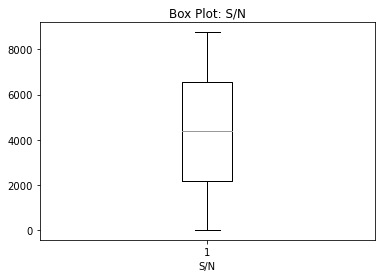

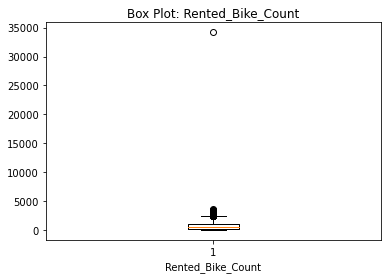

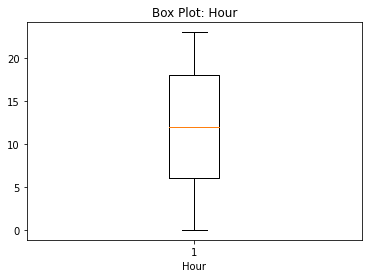

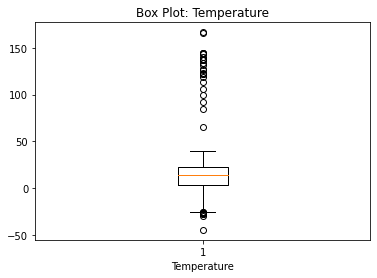

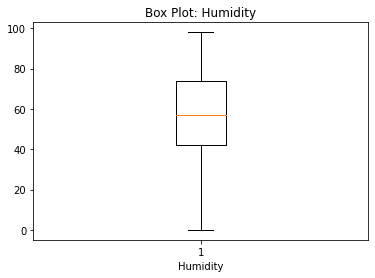

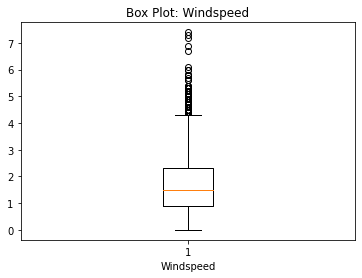

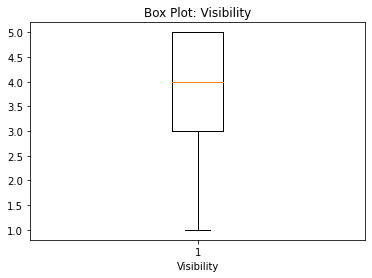

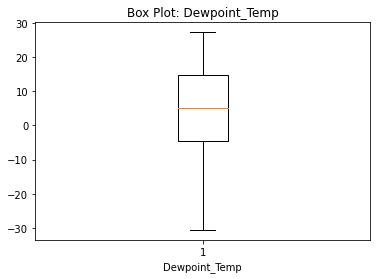

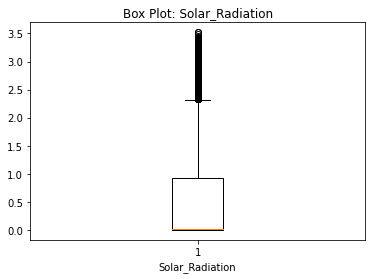

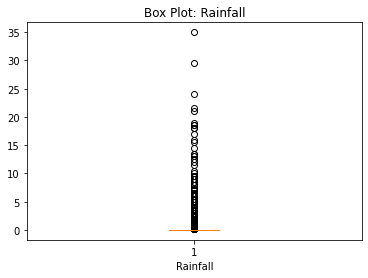

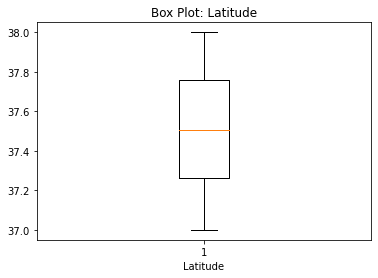

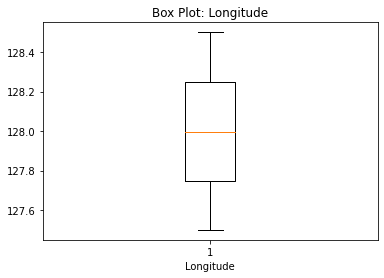

In [28]:
#Selects numerical columns only.
numerical_columns = df.select_dtypes(include='number')

#Creates box plots for each and every numerical column.
for column in numerical_columns:
    plt.boxplot(df[column])
    plt.title(f'Box Plot: {column}')
    plt.xlabel(column)
    plt.show()

#### 4.1) Temperature Anomalies

For anomalies within the Temperature column, I used inter-quartile range to sort and drop the values that fall out of the range, as it is unusual to see temperatures of 40 degrees celsius and above as that would be too hot for humans to live in, and after dropping the anomalies, the minimum of -25 degrees celsius was normal for me as this data was recorded in Japan yearly, which includes the winter season where the temperature tends to drop to really cold temperatures.

In [29]:
#Calculates the IQR (Interquartile Range) for the column.
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1

#Defines the lower and upper bounds for anomalies
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filters the DataFrame to identify the rows containing anomalies.
anomalies = df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]

#Deletes the identified rows from the DataFrame.
df = df.drop(anomalies.index)

<hr style="border: 2px dashed blue;">

#### 4.2) Rented_Bike_Count Anomalies

The anomaly in Rented_Bike_Count was that there was a value of 34000 which does not make sense as the other values were at a highest amount of roughly 3000, so I used Z-score to identify any anomalies, and changed the threshold from 3 to 4, as 3 was not enough to identify the anomaly of 34000.

In [30]:
df['z_score'] = np.abs((df['Rented_Bike_Count'] - df['Rented_Bike_Count'].mean()) / df['Rented_Bike_Count'].std())

#Defines the threshold for the Z-score to identify anomalies.
threshold = 4

#Filters the DataFrame to identify the rows containing anomalies.
anomalies = df[df['z_score'] > threshold]

#Deletes the identified rows from the DataFrame.
df = df.drop(anomalies.index)

#Removes the 'z_score' column
df = df.drop('z_score', axis=1)

<hr style="border: 2px dashed blue;">

#### 4.3) Negative values in Rented_Bike_Count

I dealt with negative value in Rented_Bike_Count by deleting the rows that has negative values in their Rented_Bike_Count column as you cannot have negative values in there.

In [31]:
#Code to check for any negative values within the Rented_Bike_Count column.
df['Rented_Bike_Count'].describe()

count    8710.000000
mean      704.512859
std       644.337189
min        -2.000000
25%       192.000000
50%       505.000000
75%      1064.750000
max      3556.000000
Name: Rented_Bike_Count, dtype: float64

In [32]:
#Finding rows with negative values in the 'Rented_Bike_Count' column.
negative_rows = df[df['Rented_Bike_Count'] < 0]

#Drop the rows with negative values from the DataFrame.
df = df.drop(negative_rows.index)

In [33]:
df['Rented_Bike_Count'].describe()

count    8709.000000
mean      704.593983
std       644.329699
min         0.000000
25%       192.000000
50%       505.000000
75%      1065.000000
max      3556.000000
Name: Rented_Bike_Count, dtype: float64

Feel free to insert more cells to continue reporting on your Data Cleaning.

## <font color= grey> Data Transformation (also known as Features Engineering)

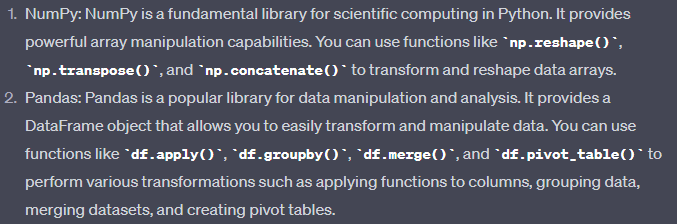

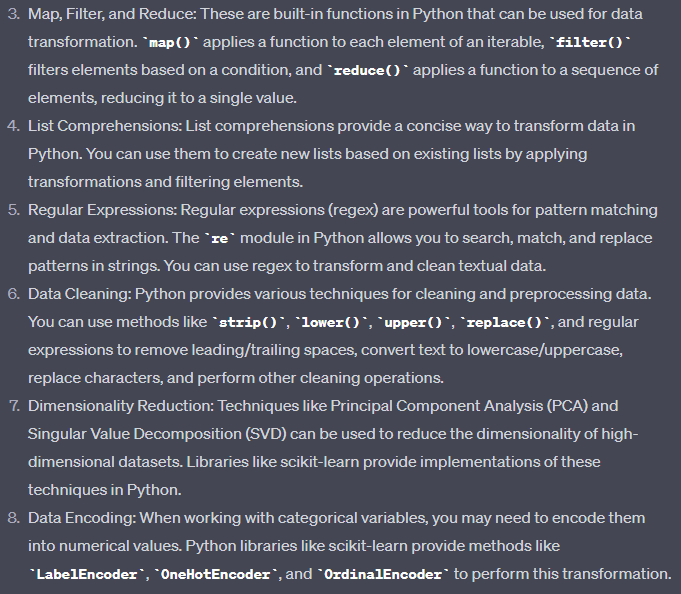

<div class="alert-success">
The suggestion I accepted was using the Data Transformation technique "Data Encodind", specifically, the method "OneHotEncoder". I used this method to One-Hot Encode my Season column in order to give the four different seasons equal importance as no season is more important than the other in this context.
</div>

<div class="alert-warning">
The suggestion I decided to research more on was NumPy and Pandas, because while I have already used them for data cleaning, I tried to see if they had more methods to offer for me to use for my data transformation, and in the end, I could not find any, or rather the methods I found did not suit my thoughts on the dataframe.
</div>

<div class="alert-danger">
From the suggestions, I rejected "Map, Filter and Reduce", "List Comprehensions", "Regular Expressions", "Data Cleaning" and "Dimensionality Reduction". This is because I have either already done those for data cleaning or they do not fit the project requirements in terms of techniques.
</div>

### Tranformation 1 (Binning columns)

#### Season

I created a new column, called 'Month' so that I could bin it later on into a column called 'Season' so that I can later track which months fall into which seasons. This also allows me to properly track the data because if the season was summer, would it be too hot for people to ride a bike or when it is winter, would it be too cold for people to ride a bike.

In [34]:
#Creates a new Month column based on the Date column.
df['Month'] = df['Date'].dt.month

#Creates a new Season column based on the Month column.
df['Season']=df['Month']

#Specifies the season that the months are associated with.
df['Season']=df['Month'].replace({12:'Winter',1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn'})

<hr style="border: 2px dashed blue;">

#### Day_Period

I binned the Hour column into the Day_Period column so that I can later track what hours are what periods of the day. This is too find out if there is a specific hour of the day where more people would go cycling. For example, would they cycle in the morning, afternoon, evening or night time?

In [35]:
#Defines the bin edges or intervals.
bin_edges = [0, 6, 12, 18, 24]  # Example: Bins for 4 time intervals: [0-6), [6-12), [12-18), [18-24)

#Creating labels for the bins.
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

#Bins the Hour column into different time periods.
df['Day_Period'] = pd.cut(df['Hour'], bins=bin_edges, labels=labels, right=False)

<hr style="border: 2px dashed blue;">

#### Weekend

I created a new Day column and binned it to make a new Weekend column to tell me whether the data was recorded on a weekend and weekday.

In [36]:
#Creates a new column for what day the data was collected on.
df['Day'] = df['Date'].dt.day

#Bins the day column into whether the day is a weekday or a weekend. 'Y' for weekend and 'N' for weekdays.
df['Weekend'] = df['Day'].apply(lambda x: 'Y' if x >= 5 else 'N')
df=df.drop(labels=('Day'), axis=1)

<hr style="border: 2px dashed blue;">

#### Raining

I created a new Raining column and binned it to show a simple yes or no to rain being present with binary, so that the modelling process would be a lot more convenient.

In [37]:
#Creates a new column to tell if it is raining or not, instead of looking at the rainfall column's numerical value. Making 'Y' showing rain be present and 'N' showing rain is not present.
df['Raining'] = df['Rainfall'].apply(lambda x: 'Y' if x > 0 else 'N')
df['Raining'].unique()

array(['N', 'Y'], dtype=object)

<hr style="border: 2px dashed blue;">

#### Japanese Public Holiday

In [38]:
pip install jpholiday


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import pandas as pd
import jpholiday

# Define a function to check if a given date is a Japanese public holiday (True to indicate a public holiday and false to indicate a non-public holiday)
def is_japanese_public_holiday(date):
    return jpholiday.is_holiday(date)

# Apply the function to create a new column for Japanese public holidays
df['Japanese_Public_Holiday'] = df['Date'].apply(is_japanese_public_holiday)

<hr style="border: 2px dashed blue;">

#### Japanese School Holiday

In [40]:
#Define the start and end dates for each holiday period.
winter_holidays_start = pd.to_datetime('2018-12-22')
winter_holidays_end = pd.to_datetime('2019-01-06')
spring_half_term_start = pd.to_datetime('2019-02-16')
spring_half_term_end = pd.to_datetime('2019-02-24')
easter_holidays_start = pd.to_datetime('2019-04-06')
easter_holidays_end = pd.to_datetime('2019-04-22')
summer_half_term_start = pd.to_datetime('2019-05-25')
summer_half_term_end = pd.to_datetime('2019-06-02')
summer_holidays_start = pd.to_datetime('2019-07-27')
summer_holidays_end = pd.to_datetime('2019-09-01')
autumn_half_term_start = pd.to_datetime('2019-10-19')
autumn_half_term_end = pd.to_datetime('2019-10-27')
winter_holidays2_start = pd.to_datetime('2019-12-20')
winter_holidays2_end = pd.to_datetime('2020-01-05')

#Create a function to check if a date falls within a holiday period.
def check_holiday(date, start_date, end_date):
    return (date >= start_date) & (date <= end_date)

#Create the school_holiday column based on the holiday periods.
df['Japanese_School_Holiday'] = (check_holiday(df['Date'], winter_holidays_start, winter_holidays_end) |
                        check_holiday(df['Date'], spring_half_term_start, spring_half_term_end) |
                        check_holiday(df['Date'], summer_half_term_start, summer_half_term_end) |
                        check_holiday(df['Date'], autumn_half_term_start, autumn_half_term_end) |
                        check_holiday(df['Date'], winter_holidays2_start, winter_holidays2_end))

df['Japanese_School_Holiday']=df['Japanese_School_Holiday'].replace({True:'Y',False:'N'})
print(df)

       S/N       Date Country  Rented_Bike_Count  Hour  Temperature  Humidity  \
0        1 2018-11-23      JP              196.0   0.0         -1.7      79.0   
1        2 2018-11-23      JP              250.0   1.0         -1.6      79.0   
2        3 2018-11-23      JP              161.0   2.0         -1.1      79.0   
3        4 2018-11-23      JP               99.0   3.0         -0.6      76.0   
4        5 2018-11-23      JP               64.0   4.0         -0.3      76.0   
...    ...        ...     ...                ...   ...          ...       ...   
8758  8759 2019-12-01      JP             1860.0  19.0         15.6      44.0   
8759  8760 2019-12-01      JP             1593.0  20.0         14.5      51.0   
8760  8761 2019-12-01      JP             1513.0  21.0         13.4      56.0   
8761  8762 2019-12-01      JP             1360.0  22.0         12.7      60.0   
8762  8763 2019-12-01      JP              916.0  23.0         12.0      59.0   

      Windspeed  Visibility

<hr style="border: 1px solid red;">

### Tranformation 2 (One-hot encoding)

I one-hot encoded the Season column because if I left it as it is, it will tell the programme that there is an order of importance when it comes to the season, which in reality, one season is not more important than the other. So this just makes all the season have equal importance.

In [41]:
#Do one-hot encoding on the season column.
one_hot_season = pd.get_dummies(df['Season'], prefix='Season')

#Concatenate the one-hot encoded columns into the dataframe.
df = pd.concat([df, one_hot_season], axis=1)

In [42]:
#Checking whether the columns have been encoded.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8709 entries, 0 to 8762
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   S/N                      8709 non-null   int64         
 1   Date                     8709 non-null   datetime64[ns]
 2   Country                  8709 non-null   object        
 3   Rented_Bike_Count        8709 non-null   float64       
 4   Hour                     8709 non-null   float64       
 5   Temperature              8709 non-null   float64       
 6   Humidity                 8709 non-null   float64       
 7   Windspeed                8709 non-null   float64       
 8   Visibility               8709 non-null   int64         
 9   Dewpoint_Temp            8709 non-null   float64       
 10  Solar_Radiation          8709 non-null   float64       
 11  Rainfall                 8709 non-null   float64       
 12  Snowfall                 8709 non-

Feel free to insert more cells to continue reporting on your Data Transformation.

## <font color= grey> Other Method(s)

Provide the description, justification and results of your technique(s) here.

### Pearson's Correlation Analysis via heatmap

Pearson's correlation coefficient is a measure of the linear relationship between two variables which I later on used a heatmap to plot it so that I can have a better visualization.

In this case, I used Pearson's method to see the correlation of most, if not all, variables in my dataframe.

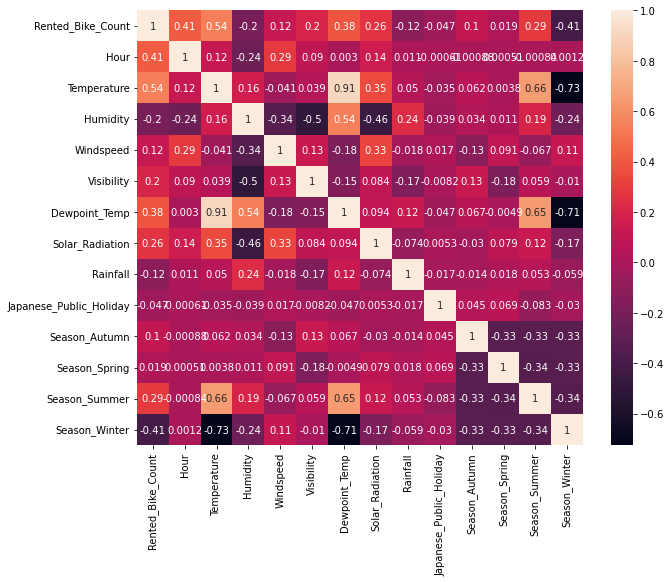

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_temp_features = df.drop(['S/N', 'Country', 'Date', 'Open', 'Hit_Sales', 'Region', 'Latitude', 'Longitude', 'Month'], axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(df_temp_features.corr(method='pearson'), annot=True)
plt.show()

<hr style="border: 2px dashed blue;">

Spearman's Correlation Test, unlike Pearson's Correlation Analysis, plot and assess non-linear correlation of the variables which is good for ordinal variables.

I used Spearman's Correlation Test to capture the non-linear correlation between the variables Rented_Bike_Count and Temperature. I used this type to get a more accurate analysis between the variables and the target variable.

In [44]:
from scipy.stats import spearmanr

#Extracts the variables from the DataFrame.
x = df['Rented_Bike_Count']
y = df['Hour']

#Calculates the Spearman's rank correlation coefficient and p-value.
corr, p_value = spearmanr(x, y)

#Prints the correlation coefficient and p-value.
print("Spearman's correlation coefficient:", corr)
print("p-value:",p_value)

Spearman's correlation coefficient: 0.3872921685173797
p-value: 1.201128603795534e-309


<hr style="border: 1px solid red;">

### Pearson's Correlation Analysis of Interval to Ratio variables.

I used Pearson's method to find the strength of the relationship or correlation between the chosen Interval and Ratio variable, Rented_Bike_Count and Windspeed respectively. This is to check if windspeed affect the variable, Rented_Bike_Count.

In [45]:
from scipy.stats import pearsonr

#Extracts the variables from the DataFrame.
x = df['Rented_Bike_Count']
y = df['Windspeed']

#Calculates the correlation between the coefficient and p-value.
corr, p_value = pearsonr(x, y)

#Prints the correlation between the coefficient and p-value.
print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

Pearson correlation coefficient: 0.11898546009302866
p-value: 7.836625351731992e-29


<hr style="border: 1px solid red;">

### Interval to Ratio Correlation Analysis

Interval to ratio correlation refers to the analysis of the correlation between interval and/or ratio variables. I used this type of analysis to due to the ratio and interval properties of these selected variables, using the correlation matrix to visually show the correlation between all interval and ratio variables selected.

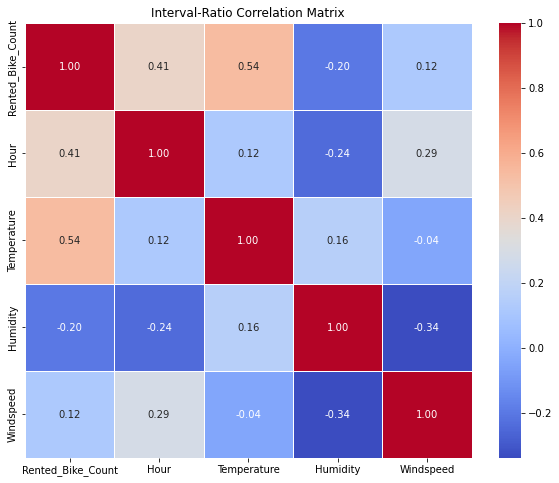

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Selected the relevant columns for interval-ratio correlation analysis.
columns = ['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Windspeed']

#Created a subset DataFrame with the selected columns.
df_subset = df[columns]

#Calculated the correlation matrix.
corr_matrix = df_subset.corr()

#Plotted the correlation matrix using a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Interval-Ratio Correlation Matrix')
plt.show()

<hr style="border: 1px solid red;">

### Ordinal to Ordinal Correlation Analysis

Ordinal to ordinal correlation analysis refers to measuring the association and strength of the relationship between two ordinal variables. It focuses on specifically categorical variables and helps to understand the extent to which the order or ranking of the categories in one variable corresponds to the order or ranking of the categories in the other variable.

Here I used it to find and measure the correlation between all relevant, if not all, ordinal columns, to which I found no correlation.

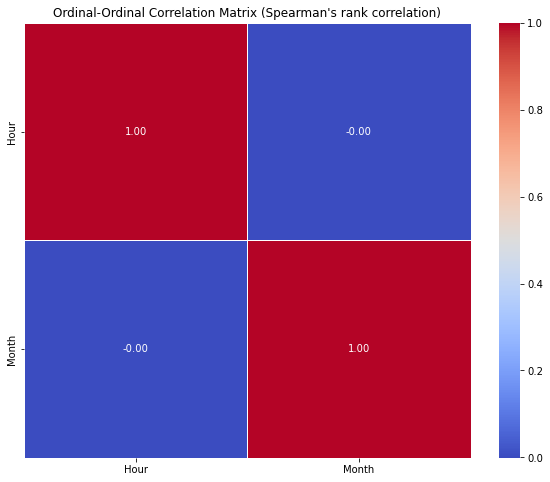

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Selecting the relevant ordinal columns for correlation analysis.
columns = ['Hour', 'Month', 'Season', 'Day_Period']

#Created a subset DataFrame with the selected columns.
df_subset = df[columns]

#Calculated the correlation matrix using Spearman's rank correlation coefficient.
corr_matrix = df_subset.corr(method='spearman')

#Plotted the correlation matrix using a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Ordinal-Ordinal Correlation Matrix (Spearman's rank correlation)")
plt.show()

# <font color= maroon>  Data Understanding using EDA 

## Takeaway 1 - Most of Japanese citizens rent the most number of bikes in the Evening.

### Hypothesis 1 - The highest count of rented bikes are in the Evening.

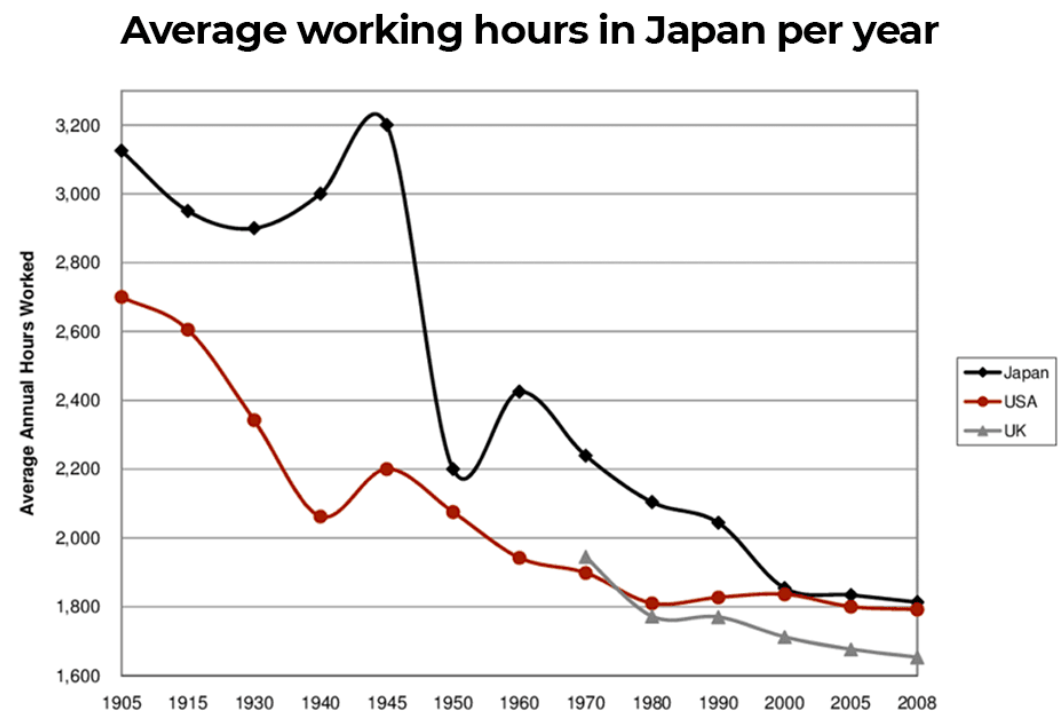

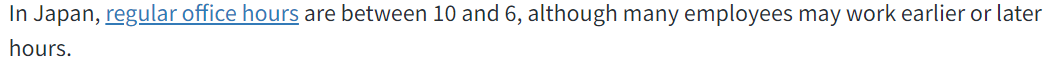

This Google source states that a regular office hour is from 10am to 6pm, and 6pm is around evening time and according to my data findings below, around evening time or 6pm, the highest count of rented bike is reach.

Source: https://4dayweek.io/country/japan#:~:text=Although%20the%20legal%20recommendation%20for,to%20%E2%80%9Cdeath%20by%20overwork%E2%80%9D.

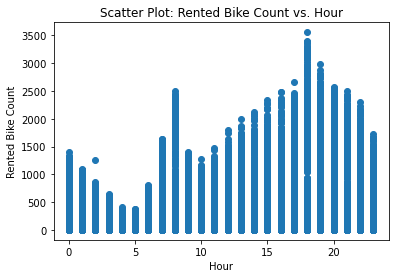

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

#Plotting the scatter plot.
plt.scatter(df['Hour'], df['Rented_Bike_Count'])
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Scatter Plot: Rented Bike Count vs. Hour')

#Shows the plot.
plt.show()

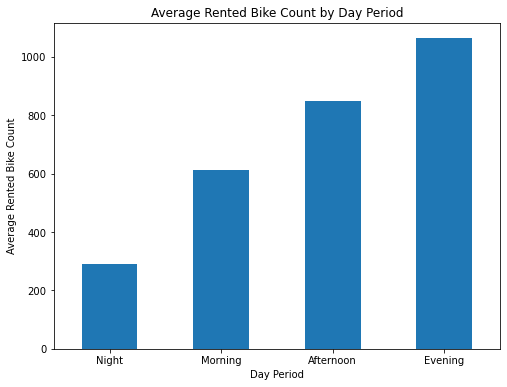

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

#Calculates the average Rented_Bike_Count for each Day_Period.
average_counts = df.groupby('Day_Period')['Rented_Bike_Count'].mean()

#Creates a bar plot.
plt.figure(figsize=(8, 6))
average_counts.plot(kind='bar')
plt.xlabel('Day Period')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Day Period')
plt.xticks(rotation=0)
plt.show()

### Conclusion

With both my data findings and Google sources supporting the evidence of the highest count of bike rents happening around evening or 6pm, my hypothesis is answered and supported. Therefore my takeaway for this data finding is that evening is the peak period for Japanese to rent bikes.

<hr style="border: 1px solid red;">


## Takeaway 2 - Summer has the highest rented bike count recorded

### Hypothesis 2 - Autumn is the best season to go cycling in the South regions of Japan

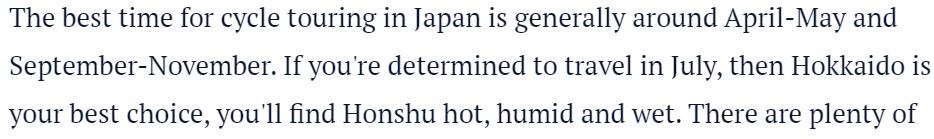

According to an article on Google, The Sydney Morning Herald, it states that the best seasons to cycle in Japan are generally during Spring and Autumn.

Source: https://www.smh.com.au/traveller/reviews-and-advice/travel-tips-when-is-the-best-time-to-do-a-selfcycle-tour-of-japan-20171027-gz9e7w.html

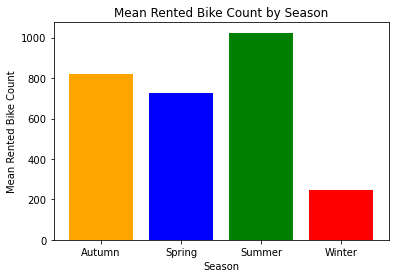

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

#Groups the data by 'Season' and calculate the mean of 'Rented_Bike_Count' for each season.
season_mean = df.groupby('Season')['Rented_Bike_Count'].mean()

#Defines a color map for each season.
color_map = {'Spring': 'blue', 'Summer': 'green', 'Autumn': 'orange', 'Winter': 'red'}

#Plots the 'Rented_Bike_Count' by 'Season' with color coding.
plt.bar(season_mean.index, season_mean.values, color=[color_map[season] for season in season_mean.index])

#Adds labels and title to the plot.
plt.xlabel('Season')
plt.ylabel('Mean Rented Bike Count')
plt.title('Mean Rented Bike Count by Season')

#Shows the plot.
plt.show()

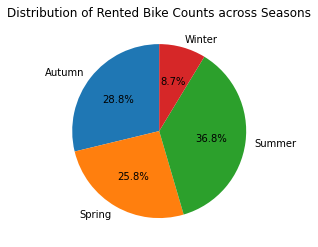

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

#Calculates the sum of 'Rented_Bike_Count' for each season.
season_counts = df.groupby('Season')['Rented_Bike_Count'].sum()

#Gets the labels for the pie chart.
labels = season_counts.index

#Gets the values for the pie chart.
values = season_counts.values

#Plots the pie chart.
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

#Adds a title to the plot.
plt.title('Distribution of Rented Bike Counts across Seasons')

#Shows the plot.
plt.show()

However, according to our data findings, it is proven that Summer is the best season to go cycling in Japan.

### Conclusion

The hypothesis where, "Autumn is the best season to go cycling in the South regions of Japan" is rejected. This is because due to our data findings which clearly proves and shows evidence of Summer having the highest count of bike rents, despite Google sources stating that the best seasons to go cycling is in Autumn and Spring. Therefore the hypothesis is rejected, and the takeaway is that Summer has the highest number of bike rented.

<hr style="border: 1px solid red;">

## Takeaway 3 - There are more rented bike counts in non-holidays

### Hypothesis 3 - There will be more rented bike counts during the holidays.

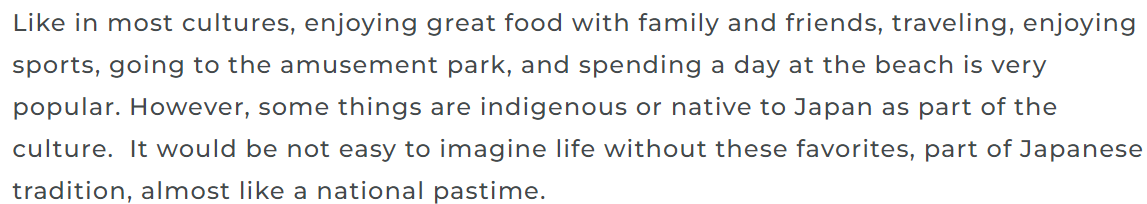

Source: https://www.ejable.com/japan-corner/japanese-culture/what-do-japanese-people-like-to-do-for-relaxation-and-entertainment/

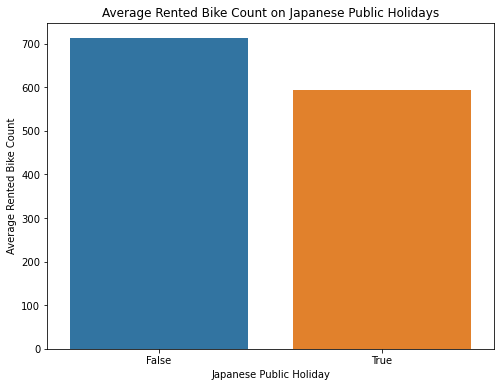

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

#Groups the data by 'Japanese_Public_Holiday' and calculate the average 'Rented_Bike_Count'.
average_count = df.groupby('Japanese_Public_Holiday')['Rented_Bike_Count'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Japanese_Public_Holiday', y='Rented_Bike_Count', data=average_count)
plt.xlabel('Japanese Public Holiday')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count on Japanese Public Holidays')
plt.show()

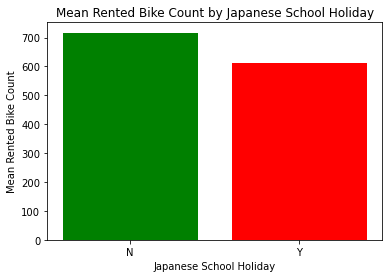

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

#Groups the data by 'Japanese_School_Holiday' and calculate the mean of 'Rented_Bike_Count' for each category.
holiday_mean = df.groupby('Japanese_School_Holiday')['Rented_Bike_Count'].mean()

#Defines the colors for 'Y' and 'N'.
colors = ['green', 'red']

#Plots the 'Rented_Bike_Count' by 'Japanese_School_Holiday' with color coding.
plt.bar(holiday_mean.index, holiday_mean.values, color=colors)

#Adds labels and title to the plot.
plt.xlabel('Japanese School Holiday')
plt.ylabel('Mean Rented Bike Count')
plt.title('Mean Rented Bike Count by Japanese School Holiday')

#Shows the plot.
plt.show()

According to my data findings, the bar plot shows that there are more rented bike counts in non-holidays then as compared to public holidays, now this might not be a good measurement of analysis as there are more non-holidays than public holidays, which is why I analyzed the pattern of rented bike count with the School holidays, which has more days compared to public holidays. 

### Conclusion

Upon analyzing the two plots, I have concluded that while there are more rented bike counts in non holidays compared to public and school holidys. Therefore, I have found my takeaway for this section and my hypothesis is rejected.

<hr style="border: 1px solid red;">

## Takeaway 4 - There are more rented bike counts in the weekends than in the weekdays

### Hypothesis 4 - There will be more rented bike counts during weekdays

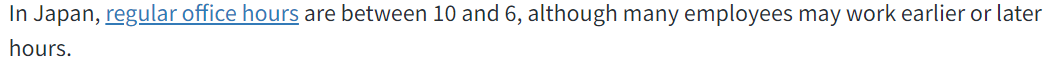

Source: https://4dayweek.io/country/japan#:~:text=Although%20the%20legal%20recommendation%20for,to%20%E2%80%9Cdeath%20by%20overwork%E2%80%9D.

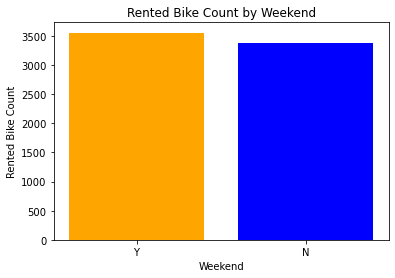

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

#Defines the colors for 'Y' and 'N'.
colors = ['blue', 'orange']

#Creates a bar plot of 'Rented_Bike_Count' by 'Weekend' with color coding.
plt.bar(df['Weekend'], df['Rented_Bike_Count'], color=[colors[val=='Y'] for val in df['Weekend']])

#Adds labels and title to the plot.
plt.xlabel('Weekend')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Weekend')

#Shows the plot.
plt.show()

### Conclusion

Upon analyzing, I have concluded that there are more counts of bike rented during weekends than in weekdays which makes sense, because according to the literature source, Japanese worked from 10am to 6pm on weekdays whereas in weekends, they have more free time, free time to rent a bike. Therefore, my takeaway is there are more counts of rented bike in weekends than in weekdays, and the hypothesis is answered and rejected.

<hr style="border: 1px solid red;">

## Takeaway 5 - Environmental factors affect the count of bike rented

### Hypothesis 5 - Environmental factors like Temperature, snowfall and rainfall affect rented bike counts

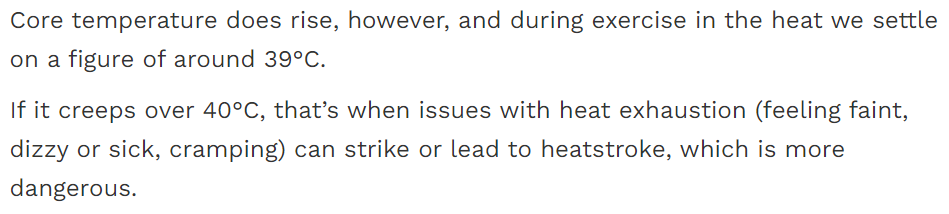

Source: https://www.cyclist.co.uk/in-depth/how-does-hot-weather-affect-your-cycling-performance

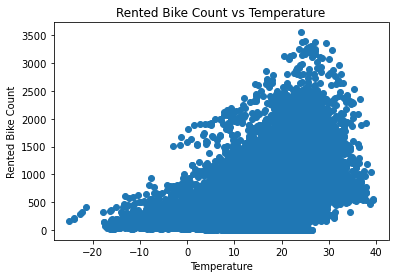

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

#Creates a scatter plot of Rented_Bike_Count vs Temperature.
plt.scatter(df['Temperature'], df['Rented_Bike_Count'])
plt.xlabel('Temperature')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count vs Temperature')
plt.show()

The source says that high temperature is dangerous which correlates with my plot as the highest count of bike rented is around 20 degrees celsius which is not as hot as 39 degrees celsius, which the source stated. Also, the lowest count of bike rented are at really borderline temperatues, like a cold -20+ degrees celsius and around a hot 30-40 degrees celsius. Therefore, temperature affects the counts of rented bikes.

<hr style="border: 2px dashed blue;">

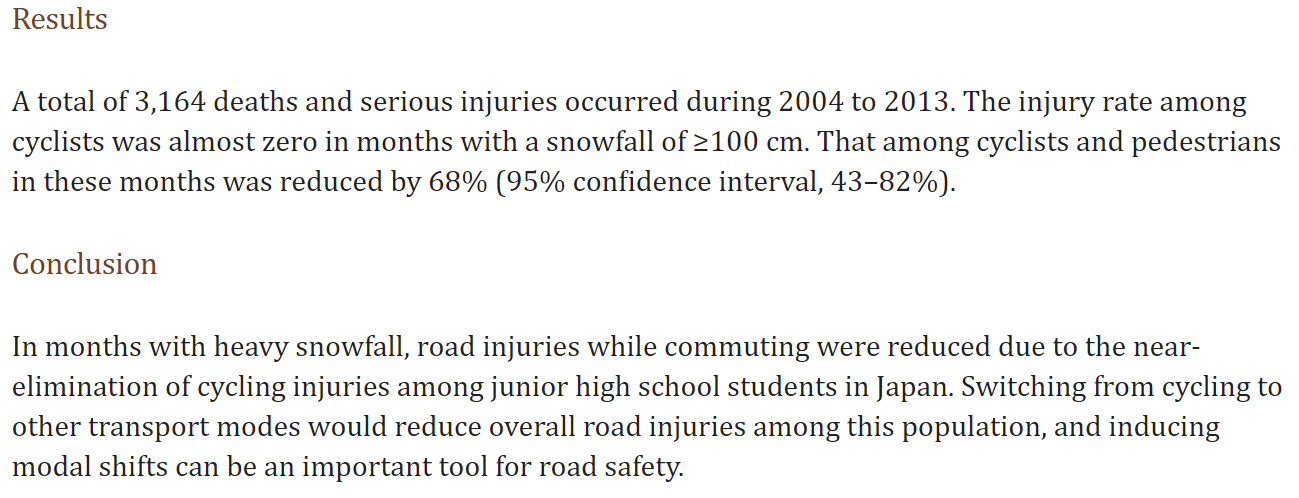

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9359898/

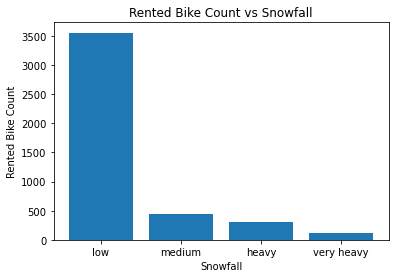

In [56]:
#Creates a bar plot of Rented_Bike_Count vs Snowfall.
plt.bar(df['Snowfall'], df['Rented_Bike_Count'])
plt.xlabel('Snowfall')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count vs Snowfall')
plt.show()

The source talks about snowfall affecting cyclists, which correlates to my graph where the highest count of bike rents are when the snowfall is low, while the lowest count of bike rents is when the snowfall is at its heaviest. Therefore, snowfall affects the counts of rented bikes.

<hr style="border: 2px dashed blue;">

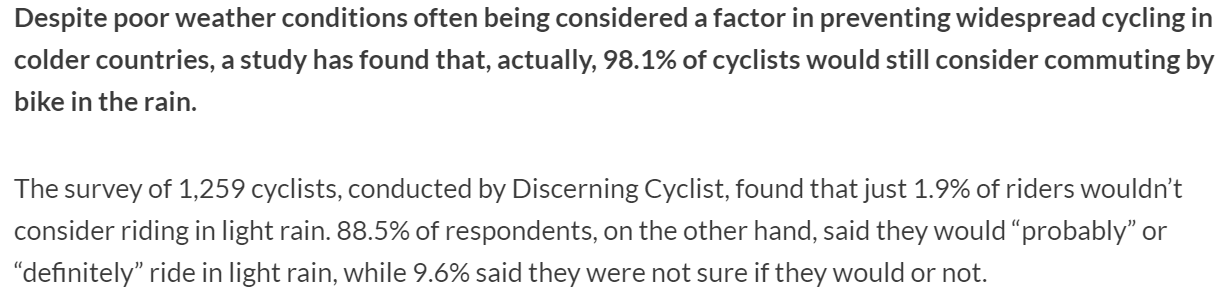

Source: https://discerningcyclist.com/cycling-in-the-rain-study/

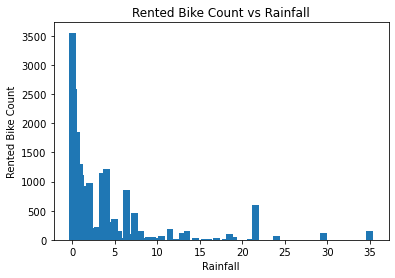

In [57]:
#Creates a bar plot of Rented_Bike_Count vs Rainfall.
plt.bar(df['Rainfall'], df['Rented_Bike_Count'])
plt.xlabel('Rainfall')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count vs Rainfall')
plt.show()

The source talks about cyclists not minding the light rain and continuing to cycle which fits and supports the graph I made which shows the highest count of bike rented when rainfall is at a minimum of 0, whereas the count of bike rented is at its lowest when rainfall is at its highest. Therefore, rainfall affects the counts of rented bikes.

<hr style="border: 2px dashed blue;">

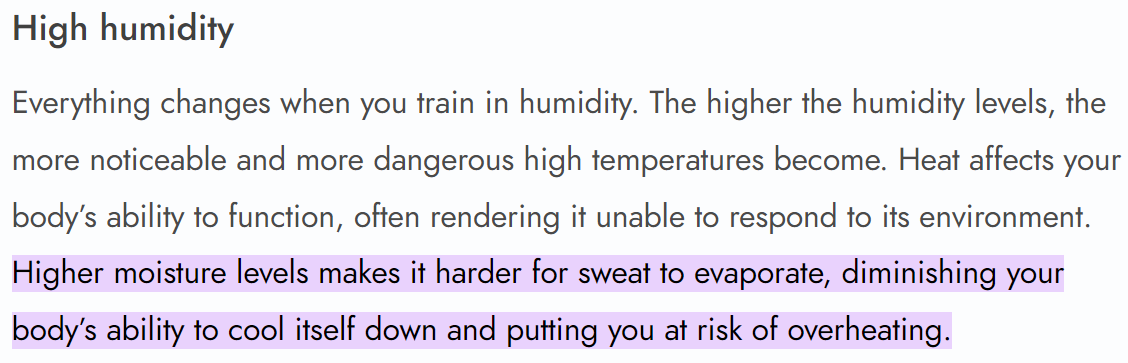

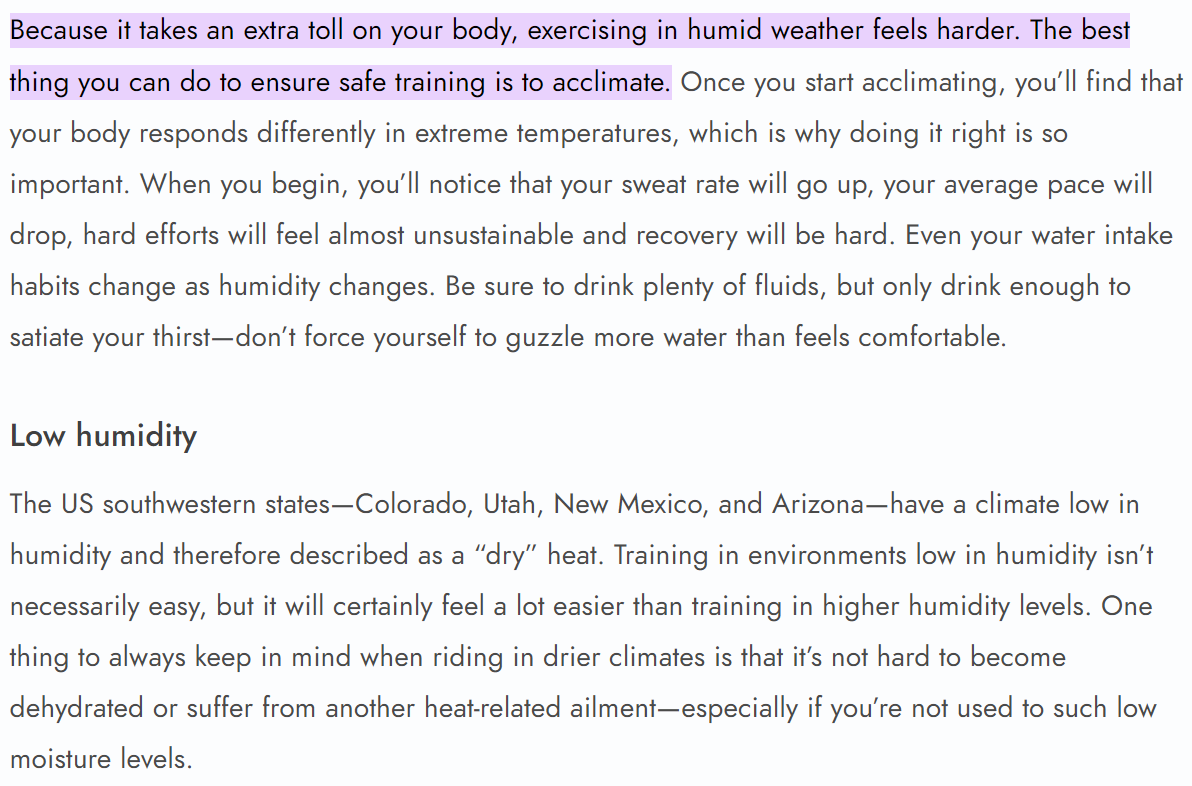

Source: https://velosurance.com/blog/beat-heat-bicycle-training-guide/#:~:text=Higher%20moisture%20levels%20makes%20it,safe%20training%20is%20to%20acclimate.

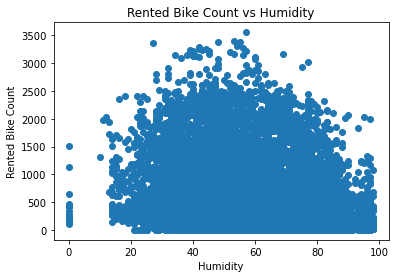

In [58]:
# Creates a scatter plot of Rented_Bike_Count vs Humidity.
plt.scatter(df['Humidity'], df['Rented_Bike_Count'])
plt.xlabel('Humidity')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count vs Humidity')
plt.show()

Based on the graph, most of the bikes were rented when humidity was at an average level and the count of bike rented shows decrease whenever humidity increases or decreases which is supported by a snippet of an article above. Therefore, humidity affects the counts of rented bikes.

<hr style="border: 2px dashed blue;">

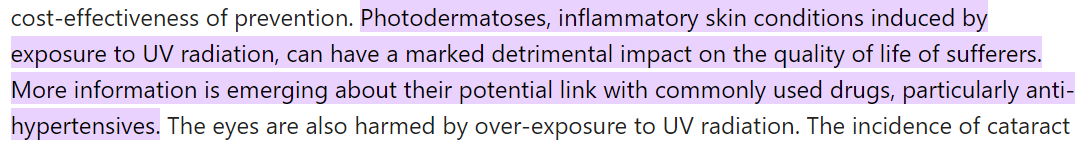

Source: https://pubmed.ncbi.nlm.nih.gov/36856971/#:~:text=Photodermatoses%2C%20inflammatory%20skin%20conditions%20induced,drugs%2C%20particularly%20anti%2Dhypertensives.

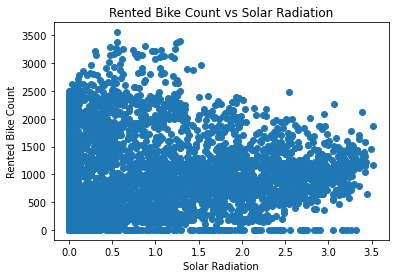

In [59]:
#Creates a scatter plot of Rented_Bike_Count vs Solar_Radiation.
plt.scatter(df['Solar_Radiation'], df['Rented_Bike_Count'])
plt.xlabel('Solar Radiation')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count vs Solar Radiation')
plt.show()

The article snippet above shows that solar radiation is very harmful if exposed to it for a long duration and the typical bike session is long enough to raise health concerns when cycling for that long under intense solar radiation periods which is evident in the highest count of bike rented being at the lowest value recorded for solar radiation, and you can see a gradual decrease in rented bike counts as the measured value for solar radiation increases. Therefore, solar radiation affects the counts of rented bikes.

### Conclusion

Upon researching and detailed analysis, I conclude that environmental factors like Temperature, Solar Radiation, Humidity, Rainfall and Snowfall do affect the number and counts of bike rented and this also answers and accepts the hypothesis.

# <font color= maroon> Data Modelling

## <font color= grey> Linear Regression

Provide the description, justification and results of your technique(s) here.

In [60]:
import numpy as np
corr_mat=df.drop(columns=['S/N', 'Latitude', 'Longitude', 'Hour', 'Month', 'Visibility']).corr() #default is Pearson's
corr_mat.style.background_gradient(cmap='Purples')

,Rented_Bike_Count,Temperature,Humidity,Windspeed,Dewpoint_Temp,Solar_Radiation,Rainfall,Japanese_Public_Holiday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
Rented_Bike_Count,1.000000,0.538287,-0.199265,0.118985,0.380532,0.261604,-0.122401,-0.046818,0.101299,0.018801,0.288792,-0.410245
Temperature,0.538287,1.000000,0.160142,-0.040757,0.910575,0.351482,0.050058,-0.035189,0.062313,0.003811,0.656129,-0.725555
Humidity,-0.199265,0.160142,1.000000,-0.337279,0.537611,-0.461947,0.235301,-0.039304,0.033800,0.011259,0.192240,-0.238256
Windspeed,0.118985,-0.040757,-0.337279,1.000000,-0.177096,0.332110,-0.018387,0.017424,-0.129239,0.090574,-0.066624,0.105276
Dewpoint_Temp,0.380532,0.910575,0.537611,-0.177096,1.000000,0.093898,0.124871,-0.047017,0.066761,-0.004906,0.645119,-0.710198
Solar_Radiation,0.261604,0.351482,-0.461947,0.332110,0.093898,1.000000,-0.073804,0.005271,-0.030026,0.079391,0.124116,-0.174297
Rainfall,-0.122401,0.050058,0.235301,-0.018387,0.124871,-0.073804,1.000000,-0.017259,-0.013645,0.018437,0.053394,-0.058514
Japanese_Public_Holiday,-0.046818,-0.035189,-0.039304,0.017424,-0.047017,0.005271,-0.017259,1.000000,0.045037,0.068539,-0.082797,-0.030378
Season_Autumn,0.101299,0.062313,0.033800,-0.129239,0.066761,-0.030026,-0.013645,0.045037,1.000000,-0.331546,-0.333981,-0.330531
Season_Spring,0.018801,0.003811,0.011259,0.090574,-0.004906,0.079391,0.018437,0.068539,-0.331546,1.000000,-0.336142,-0.332669


In [61]:
#Correlation with target column.
cor_target = abs(corr_mat['Rented_Bike_Count'])  # interested in the strength, direction doesn't matter
#Selecting highly correlated attributes.
relevant_features = cor_target[cor_target > 0.2]
relevant_features

Rented_Bike_Count    1.000000
Temperature          0.538287
Dewpoint_Temp        0.380532
Solar_Radiation      0.261604
Season_Summer        0.288792
Season_Winter        0.410245
Name: Rented_Bike_Count, dtype: float64

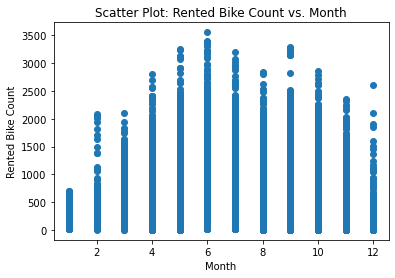

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

#Plotting the scatter plot.
plt.scatter(df['Month'], df['Rented_Bike_Count'])
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.title('Scatter Plot: Rented Bike Count vs. Month')

#Shows the plot.
plt.show()

In [63]:
#Code to add more columns based on individual hours and months, including the open status of the stores.

df = pd.get_dummies(df, columns=['Hour'])

df = pd.get_dummies(df, columns=['Month'])

df = pd.get_dummies(df, columns=['Open'])

In [64]:
df.columns

Index(['S/N', 'Date', 'Country', 'Rented_Bike_Count', 'Temperature',
       'Humidity', 'Windspeed', 'Visibility', 'Dewpoint_Temp',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hit_Sales', 'Region',
       'Latitude', 'Longitude', 'Season', 'Day_Period', 'Weekend', 'Raining',
       'Japanese_Public_Holiday', 'Japanese_School_Holiday', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Hour_0.0',
       'Hour_1.0', 'Hour_2.0', 'Hour_3.0', 'Hour_4.0', 'Hour_5.0', 'Hour_6.0',
       'Hour_7.0', 'Hour_8.0', 'Hour_9.0', 'Hour_10.0', 'Hour_11.0',
       'Hour_12.0', 'Hour_13.0', 'Hour_14.0', 'Hour_15.0', 'Hour_16.0',
       'Hour_17.0', 'Hour_18.0', 'Hour_19.0', 'Hour_20.0', 'Hour_21.0',
       'Hour_22.0', 'Hour_23.0', 'Month_1', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Open_No', 'Open_Yes'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8709 entries, 0 to 8762
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   S/N                      8709 non-null   int64         
 1   Date                     8709 non-null   datetime64[ns]
 2   Country                  8709 non-null   object        
 3   Rented_Bike_Count        8709 non-null   float64       
 4   Temperature              8709 non-null   float64       
 5   Humidity                 8709 non-null   float64       
 6   Windspeed                8709 non-null   float64       
 7   Visibility               8709 non-null   int64         
 8   Dewpoint_Temp            8709 non-null   float64       
 9   Solar_Radiation          8709 non-null   float64       
 10  Rainfall                 8709 non-null   float64       
 11  Snowfall                 8709 non-null   object        
 12  Hit_Sales                8709 non-

In [66]:
from sklearn.model_selection import train_test_split #Partition your original df into Train and Val set.
from sklearn.preprocessing import StandardScaler #A MUST for algos such as KMEANS.
#OPTIONAL for Linear/Logistic Regression PROVIDED you want to compare quantitatively the BETA COEFF (for interpretability).
#Typical scenario: Scale -> Build-Interpret; Original -> Build -> Sub values to make Prediction.

scaler = StandardScaler() #Define a placeholder to perform scaling.
Y = df["Rented_Bike_Count"] #Set this column 'Price' as TARGET.
X = df[['Temperature', 'Hour_0.0',
       'Hour_1.0', 'Hour_2.0', 'Hour_3.0', 'Hour_5.0', 'Hour_6.0',
       'Hour_7.0', 'Hour_8.0', 'Hour_9.0', 'Hour_10.0', 'Hour_11.0',
       'Hour_12.0', 'Hour_13.0', 'Hour_14.0', 'Hour_15.0', 'Hour_16.0',
       'Hour_17.0', 'Hour_18.0', 'Hour_19.0', 'Hour_20.0', 'Hour_21.0',
       'Hour_22.0', 'Hour_23.0', 'Open_Yes']] #Select these columns as PREDICTORS/FEATURES.
X_std = scaler.fit_transform(X) #Scale your FEATURE SPACE into z scores.
X_train, X_val, Y_train, Y_val = train_test_split(X_std, Y, train_size=0.8, \
                                                  shuffle=True, random_state=2204064)
#train_size = 0.8 -> 80% used for training, 20% used for validation
#shuffle = True to randomise your df to reduce bias, and ensure train and val sets characteristics are similar.
#in your Assignment, random_state=Yourlast4DigitsAdm
#set random_state for repeatability

In [67]:
X_train.shape

(6967, 25)

In [68]:
X_val.shape

(1742, 25)

In [69]:
Y_train.shape

(6967,)

In [70]:
from sklearn import linear_model
#define a placeholder
my_regr = linear_model.LinearRegression()
#fit the x and y data into the model
#this will give the best parameters to minimize the error term (find the 'best-fit-line')
my_regr.fit(X_train, Y_train)

LinearRegression()

In [71]:
print("Intercept: \n", my_regr.intercept_)
print("Beta Coefficients: \n", my_regr.coef_)

Intercept: 
 700.3929273281169
Beta Coefficients: 
 [327.78669156  76.14353939  57.14717785  32.2377449   14.30312141
   1.28685861  33.80139823  96.78772663 175.45846489  95.79770299
  65.34569227  72.06222421  85.64313311  88.89350043  86.22141336
 101.96044889 124.10601158 171.00929993 235.96623343 189.7862722
 168.9238568  164.66138826 149.36370058  99.05955088 146.41490821]


In [72]:
coeff_df = pd.DataFrame(my_regr.coef_, X.columns, columns = ["Cofficients"])
coeff_df

,Cofficients
Temperature,327.786692
Hour_0.0,76.143539
Hour_1.0,57.147178
Hour_2.0,32.237745
Hour_3.0,14.303121
Hour_5.0,1.286859
Hour_6.0,33.801398
Hour_7.0,96.787727
Hour_8.0,175.458465
Hour_9.0,95.797703


In [73]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

Y_pred=my_regr.predict(X_val) #use this predicted check again y_val
print("Mean Squared Error for val set: %0.2f" % mean_squared_error(Y_val, Y_pred))
print("Coefficient of Determination for val set: %0.2f" % r2_score(Y_val, Y_pred))

Mean Squared Error for val set: 181784.14
Coefficient of Determination for val set: 0.58


In [74]:
Y_pred_train=my_regr.predict(X_train) #use this predicted check again y_val
print("Mean Squared Error for val set: %0.2f" % mean_squared_error(Y_train, Y_pred_train))
print("Coefficient of Determination for training set: %0.2f" % r2_score(Y_train, Y_pred_train))

Mean Squared Error for val set: 176704.00
Coefficient of Determination for training set: 0.57


In [75]:
# Note that the unit for Mean Squared Error is $ square.
# Let's convert into unit of $ to assess if the model built is 'good enough'
import math
print("Root Mean Squared Error for val set: %0.2f" % math.sqrt(mean_squared_error(Y_val, Y_pred)))

Root Mean Squared Error for val set: 426.36


In [76]:
import statsmodels.api as sm
# use another package to provide the full summary of the model
X_train = sm.add_constant(X_train)
X_val=sm.add_constant(X_val)
my_regr2 = sm.OLS(Y_train, X_train).fit() #OLS means ordinary least square
print(my_regr2.summary())
Y_pred2 = my_regr2.predict(X_val) #perform prediction
print(Y_pred2)

                            OLS Regression Results                            
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     367.3
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:39:18   Log-Likelihood:                -51974.
No. Observations:                6967   AIC:                         1.040e+05
Df Residuals:                    6941   BIC:                         1.042e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        700.3929      5.048    138.748      0.0

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, RepeatedKFold

#Takes the dataset and splits into five.
cv = RepeatedKFold(n_splits=5, random_state=2204064)

model_list=[]
#Create linear regressor model.
LR = LinearRegression()

#Cross validate this model and return RMSE.
score_RMSE = cross_val_score(LR, X_train, Y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

#Stores results.
model_list.extend([-1*np.mean(score_RMSE).round(2), 3])

print(f"Mean RMSE: {model_list[0]}")

Mean RMSE: 421.92


<hr style="border: 1px solid red;">

In [78]:
from sklearn.model_selection import train_test_split #Partition your original df into Train and Val set.
from sklearn.preprocessing import StandardScaler #A MUST for algos such as KMEANS.
#OPTIONAL for Linear/Logistic Regression PROVIDED you want to compare quantitatively the BETA COEFF (for interpretability).
#Typical scenario: Scale -> Build-Interpret; Original -> Build -> Sub values to make Prediction.

scaler = StandardScaler() #Define a placeholder to perform scaling.
Y = df["Rented_Bike_Count"] #Set this column 'Price' as TARGET.
X = df[['Temperature', 'Rainfall', 'Hour_0.0',
       'Hour_1.0', 'Hour_2.0', 'Hour_3.0', 'Hour_5.0', 'Hour_6.0',
       'Hour_7.0', 'Hour_8.0', 'Hour_9.0', 'Hour_10.0', 'Hour_11.0',
       'Hour_12.0', 'Hour_13.0', 'Hour_14.0', 'Hour_15.0', 'Hour_16.0',
       'Hour_17.0', 'Hour_18.0', 'Hour_19.0', 'Hour_20.0', 'Hour_21.0',
       'Hour_22.0', 'Hour_23.0', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Open_Yes']] #Select these columns as PREDICTORS/FEATURES.
X_std = scaler.fit_transform(X) #Scale your FEATURE SPACE into z scores.
X_train, X_val, Y_train, Y_val = train_test_split(X_std, Y, train_size=0.8, \
                                                  shuffle=True, random_state=2204064)
#train_size = 0.8 -> 80% used for training, 20% used for validation
#shuffle = True to randomise your df to reduce bias, and ensure train and val sets characteristics are similar.
#in your Assignment, random_state=Yourlast4DigitsAdm
#set random_state for repeatability

In [79]:
X_train.shape

(6967, 37)

In [80]:
X_val.shape

(1742, 37)

In [81]:
Y_train.shape

(6967,)

In [82]:
from sklearn import linear_model
#define a placeholder
my_regr = linear_model.LinearRegression()
#fit the x and y data into the model
#this will give the best parameters to minimize the error term (find the 'best-fit-line')
my_regr.fit(X_train, Y_train)

LinearRegression()

In [83]:
print("Intercept: \n", my_regr.intercept_)
print("Beta Coefficients: \n", my_regr.coef_)

Intercept: 
 699.1626283957456
Beta Coefficients: 
 [ 277.7869764  -107.7023245    77.46962741   57.28110537   30.57032819
   13.71708604   -0.91164422   34.76380907   95.65386844  175.80332806
  100.64406005   67.78781578   76.23611565   92.4814494    95.63819073
   92.23431059  108.80361718  127.55984458  176.1286071   244.06536294
  193.37653179  173.86341643  170.96877909  148.83228446  100.21768851
    3.06892636   14.47013994   47.49122507   77.39021393  117.45197799
   33.09468961   -8.94259226   81.19362439  101.42556901   75.4559474
    5.48099348  162.78191561]


In [84]:
coeff_df = pd.DataFrame(my_regr.coef_, X.columns, columns = ["Cofficients"])
coeff_df

,Cofficients
Temperature,277.786976
Rainfall,-107.702325
Hour_0.0,77.469627
Hour_1.0,57.281105
Hour_2.0,30.570328
Hour_3.0,13.717086
Hour_5.0,-0.911644
Hour_6.0,34.763809
Hour_7.0,95.653868
Hour_8.0,175.803328


In [85]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

Y_pred=my_regr.predict(X_val) #use this predicted check again y_val
print("Mean Squared Error for val set: %0.2f" % mean_squared_error(Y_val, Y_pred))
print("Coefficient of Determination for val set: %0.2f" % r2_score(Y_val, Y_pred))

Mean Squared Error for val set: 148104.30
Coefficient of Determination for val set: 0.66


In [86]:
Y_pred_train=my_regr.predict(X_train) #use this predicted check again y_val
print("Mean Squared Error for val set: %0.2f" % mean_squared_error(Y_train, Y_pred_train))
print("Coefficient of Determination for training set: %0.2f" % r2_score(Y_train, Y_pred_train))

Mean Squared Error for val set: 146107.07
Coefficient of Determination for training set: 0.64


In [87]:
# Note that the unit for Mean Squared Error is $ square.
# Let's convert into unit of $ to assess if the model built is 'good enough'
import math
print("Root Mean Squared Error for val set: %0.2f" % math.sqrt(mean_squared_error(Y_val, Y_pred)))

Root Mean Squared Error for val set: 384.84


In [88]:
import statsmodels.api as sm
# use another package to provide the full summary of the model
X_train = sm.add_constant(X_train)
X_val=sm.add_constant(X_val)
my_regr2 = sm.OLS(Y_train, X_train).fit() #OLS means ordinary least square
print(my_regr2.summary())
Y_pred2 = my_regr2.predict(X_val) #perform prediction
print(Y_pred2)

                            OLS Regression Results                            
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     338.8
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:39:22   Log-Likelihood:                -51312.
No. Observations:                6967   AIC:                         1.027e+05
Df Residuals:                    6929   BIC:                         1.030e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        699.1626      4.595    152.148      0.0

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, RepeatedKFold

#Takes the dataset and splits into five.
cv = RepeatedKFold(n_splits=5, random_state=2204064)

model_list=[]
#Create linear regressor model.
LR = LinearRegression()

#Cross validate this model and return RMSE.
score_RMSE = cross_val_score(LR, X_train, Y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

#Stores results.
model_list.extend([-1*np.mean(score_RMSE).round(2), 3])

print(f"Mean RMSE: {model_list[0]}")

Mean RMSE: 385.14


<hr style="border: 1px solid red;">

In [90]:
from sklearn.model_selection import train_test_split #Partition your original df into Train and Val set.
from sklearn.preprocessing import StandardScaler #A MUST for algos such as KMEANS.
#OPTIONAL for Linear/Logistic Regression PROVIDED you want to compare quantitatively the BETA COEFF (for interpretability).
#Typical scenario: Scale -> Build-Interpret; Original -> Build -> Sub values to make Prediction.

scaler = StandardScaler() #Define a placeholder to perform scaling.
Y = df["Rented_Bike_Count"] #Set this column 'Price' as TARGET.
X = df[['Temperature',
       'Humidity', 'Windspeed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Hour_0.0',
       'Hour_1.0', 'Hour_2.0', 'Hour_3.0', 'Hour_5.0', 'Hour_6.0',
       'Hour_7.0', 'Hour_8.0', 'Hour_9.0', 'Hour_10.0', 'Hour_11.0',
       'Hour_12.0', 'Hour_13.0', 'Hour_14.0', 'Hour_15.0', 'Hour_16.0',
       'Hour_17.0', 'Hour_18.0', 'Hour_19.0', 'Hour_20.0', 'Hour_21.0',
       'Hour_22.0', 'Hour_23.0', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Open_Yes']] #Select these columns as PREDICTORS/FEATURES.
X_std = scaler.fit_transform(X) #Scale your FEATURE SPACE into z scores.
X_train, X_val, Y_train, Y_val = train_test_split(X_std, Y, train_size=0.8, \
                                                  shuffle=True, random_state=2204064)
#train_size = 0.8 -> 80% used for training, 20% used for validation
#shuffle = True to randomise your df to reduce bias, and ensure train and val sets characteristics are similar.
#in your Assignment, random_state=Yourlast4DigitsAdm
#set random_state for repeatability

In [91]:
X_train.shape

(6967, 41)

In [92]:
X_val.shape

(1742, 41)

In [93]:
Y_train.shape

(6967,)

In [94]:
from sklearn import linear_model
#define a placeholder
my_regr = linear_model.LinearRegression()
#fit the x and y data into the model
#this will give the best parameters to minimize the error term (find the 'best-fit-line')
my_regr.fit(X_train, Y_train)

LinearRegression()

In [95]:
print("Intercept: \n", my_regr.intercept_)
print("Beta Coefficients: \n", my_regr.coef_)

Intercept: 
 700.4363089887765
Beta Coefficients: 
 [ 2.95376480e+02 -1.21225663e+02  2.20884517e-01  2.70996602e+01
  4.65883445e+01 -6.97991124e+01  7.08388492e+01  5.29958149e+01
  2.88577079e+01  1.26889824e+01 -2.54704264e-01  3.53866732e+01
  9.47404377e+01  1.68697076e+02  8.06104582e+01  3.63657478e+01
  3.61180871e+01  4.46570816e+01  4.37323837e+01  4.12595582e+01
  5.78407224e+01  8.30857480e+01  1.38275041e+02  2.14908007e+02
  1.71150145e+02  1.57388275e+02  1.56658671e+02  1.39002088e+02
  9.21679940e+01 -4.59567595e+00  2.69132857e+01  4.63907222e+01
  8.61166576e+01  1.24380404e+02  4.24860485e+01 -4.76684690e+00
  8.02699335e+01  1.05168265e+02  8.95351555e+01  2.05748467e+01
  1.63184021e+02]


In [96]:
coeff_df = pd.DataFrame(my_regr.coef_, X.columns, columns = ["Cofficients"])
coeff_df

,Cofficients
Temperature,295.376480
Humidity,-121.225663
Windspeed,0.220885
Visibility,27.099660
Solar_Radiation,46.588344
Rainfall,-69.799112
Hour_0.0,70.838849
Hour_1.0,52.995815
Hour_2.0,28.857708
Hour_3.0,12.688982


In [97]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

Y_pred=my_regr.predict(X_val) #use this predicted check again y_val
print("Mean Squared Error for val set: %0.2f" % mean_squared_error(Y_val, Y_pred))
print("Coefficient of Determination for val set: %0.2f" % r2_score(Y_val, Y_pred))

Mean Squared Error for val set: 133453.52
Coefficient of Determination for val set: 0.69


In [98]:
Y_pred_train=my_regr.predict(X_train) #use this predicted check again y_val
print("Mean Squared Error for val set: %0.2f" % mean_squared_error(Y_train, Y_pred_train))
print("Coefficient of Determination for training set: %0.2f" % r2_score(Y_train, Y_pred_train))

Mean Squared Error for val set: 129985.64
Coefficient of Determination for training set: 0.68


In [99]:
# Note that the unit for Mean Squared Error is $ square.
# Let's convert into unit of $ to assess if the model built is 'good enough'
import math
print("Root Mean Squared Error for val set: %0.2f" % math.sqrt(mean_squared_error(Y_val, Y_pred)))

Root Mean Squared Error for val set: 365.31


In [100]:
import statsmodels.api as sm
# use another package to provide the full summary of the model
X_train = sm.add_constant(X_train)
X_val=sm.add_constant(X_val)
my_regr2 = sm.OLS(Y_train, X_train).fit() #OLS means ordinary least square
print(my_regr2.summary())
Y_pred2 = my_regr2.predict(X_val) #perform prediction
print(Y_pred2)

                            OLS Regression Results                            
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     364.5
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:39:22   Log-Likelihood:                -50905.
No. Observations:                6967   AIC:                         1.019e+05
Df Residuals:                    6925   BIC:                         1.022e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        700.4363      4.336    161.527      0.0

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, RepeatedKFold

#Takes the dataset and splits into five.
cv = RepeatedKFold(n_splits=5, random_state=2204064)

model_list=[]
#Create linear regressor model.
LR = LinearRegression()

#Cross validate this model and return RMSE.
score_RMSE = cross_val_score(LR, X_train, Y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

#Stores results.
model_list.extend([-1*np.mean(score_RMSE).round(2), 3])

print(f"Mean RMSE: {model_list[0]}")

Mean RMSE: 363.17


I have created three Linear Regression models testing different predictors. The best model is based on how low the mean RMSE(Root Mean Squared Error) of the model is:

1st Model: Mean RMSE: 421.92, Coefficient of Determination for val set: 0.58, Coefficient of Determination for training set: 0.57

2nd Model: Mean RMSE: 385.14, Coefficient of Determination for val set: 0.66, Coefficient of Determination for training set: 0.64

3rd Model: Mean RMSE: 363.17, Coefficient of Determination for val set: 0.69, Coefficient of Determination for training set: 0.68

Therefore, the third model is the best with its lowest Mean RMSE calculated and thus the equation for the best performer, the third model, is written below with its respective predictors/columns and coefficients:

Rented_Bike_Count = (295.376480 * Temperature) + (-121.225663 * Humidity) + (0.220885 * Windspeed) + (27.099660 * Visibility) + (46.588344 * Solar_Radiation) + (-69.799112 * Rainfall) + (70.838849 * Hour_0.0) + (52.995815 * Hour_1.0) + (28.857708 * Hour_2.0) + (12.688982 * Hour_3.0) + (-0.254704 * Hour_5.0) + (35.386673 * Hour_6.0) + (94.740438 * Hour_7.0) + (168.697076 * Hour_8.0) + (80.610458 * Hour_9.0) + (36.365748 * Hour_10.0) + (36.118087 * Hour_11.0) + (44.657082 * Hour_12.0) + (43.732384 * Hour_13.0) + (41.259558 * Hour_14.0) + (57.840722 * Hour_15.0) + (83.085748 * Hour_16.0) + (138.275041 * Hour_17.0) + (214.908007 * Hour_18.0) + (171.150145 * Hour_19.0) + (157.388275 * Hour_20.0) + (156.658671 * Hour_21.0) + (139.002088 * Hour_22.0) + (92.167994 * Hour_23.0) + (-4.595676 * Month_2) + (26.913286 * Month_3) + (46.390722 * Month_4) + (86.116658 * Month_5) + (124.380404 * Month_6) + (42.486048 * Month_7) + (-4.766847 * Month_8) + (80.269933 * Month_9) + (105.168265 * Month_10) + (89.535156 * Month_11) + (20.574847 * Month_12) + (163.184021 * Open_Yes)

## <font color= grey> Logistic Regression

Provide the description, justification and results of your technique(s) here.

In [102]:
df=df 
df.head()

,S/N,Date,Country,Rented_Bike_Count,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Open_No,Open_Yes
0,1,2018-11-23,JP,196.0,-1.7,79.0,0.5,3,-4.8,0.0,...,0,0,0,0,0,0,1,0,0,1
1,2,2018-11-23,JP,250.0,-1.6,79.0,0.6,3,-4.7,0.0,...,0,0,0,0,0,0,1,0,0,1
2,3,2018-11-23,JP,161.0,-1.1,79.0,0.7,3,-4.2,0.0,...,0,0,0,0,0,0,1,0,0,1
3,4,2018-11-23,JP,99.0,-0.6,76.0,0.5,3,-4.3,0.0,...,0,0,0,0,0,0,1,0,0,1
4,5,2018-11-23,JP,64.0,-0.3,76.0,0.9,3,-4.0,0.0,...,0,0,0,0,0,0,1,0,0,1


In [103]:
y=df['Hit_Sales']
x=df[['Temperature',
       'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Open_Yes']]

In [104]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, \
                                                  shuffle=True, random_state=2204064)

In [105]:
x_train.shape

(6967, 13)

In [106]:
from sklearn import linear_model
#define a placeholder
my_classifier = linear_model.LogisticRegression(max_iter=1000) 
#fit/build the model
my_classifier.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [107]:
print("Intercept: \n", my_classifier.intercept_)
print("Beta Coefficients: \n", my_classifier.coef_[0])

Intercept: 
 [-8.75728638]
Beta Coefficients: 
 [ 0.20300221  0.19026047  0.62151175  1.18455529  0.81939979  0.39652352
 -1.19525716 -1.85564403  0.28947689  1.90360447  1.77463795  0.20867248
  4.02630008]


In [108]:
coeff_df2 = pd.DataFrame(my_classifier.coef_[0], x.columns, columns = ["Cofficients"])
coeff_df2

,Cofficients
Temperature,0.203002
Month_2,0.190260
Month_3,0.621512
Month_4,1.184555
Month_5,0.819400
Month_6,0.396524
Month_7,-1.195257
Month_8,-1.855644
Month_9,0.289477
Month_10,1.903604


In [109]:
y_pred=my_classifier.predict(x_val) #use this predicted check again y_val
print("Accuracy: %0.2f" % accuracy_score(y_val, y_pred))

Accuracy: 0.81


In [110]:
y_pred_train=my_classifier.predict(x_train) #use this predicted check again y_train
print("Accuracy: %0.2f" % accuracy_score(y_train,y_pred_train))

Accuracy: 0.79


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedKFold

# Set up repeated k-fold CV, repeated twice
cv = RepeatedKFold(n_splits=5, random_state=2204064)

model_list=[]
# create logistic regressor model
log_reg = LogisticRegression()

# Cross validate this model and return accuracy
score_accuracy = cross_val_score(log_reg, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# Pass accuracy scores into respective list for comparison
model_list.extend([np.mean(score_accuracy).round(2), 3])

print(f"Mean Accuracy: {model_list[0]}")

Mean Accuracy: 0.79


In [112]:
y=df['Hit_Sales']
x=df[['Temperature',
       'Hour_0.0',
       'Hour_1.0', 'Hour_2.0', 'Hour_3.0', 'Hour_5.0', 'Hour_6.0',
       'Hour_7.0', 'Hour_8.0', 'Hour_9.0', 'Hour_10.0', 'Hour_11.0',
       'Hour_12.0', 'Hour_13.0', 'Hour_14.0', 'Hour_15.0', 'Hour_16.0',
       'Hour_17.0', 'Hour_18.0', 'Hour_19.0', 'Hour_20.0', 'Hour_21.0',
       'Hour_22.0', 'Hour_23.0', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Open_Yes']]

In [113]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, \
                                                  shuffle=True, random_state=2204064)

In [114]:
x_train.shape

(6967, 36)

In [115]:
from sklearn import linear_model
#define a placeholder
my_classifier = linear_model.LogisticRegression(max_iter=1000) 
#fit/build the model
my_classifier.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [116]:
print("Intercept: \n", my_classifier.intercept_)
print("Beta Coefficients: \n", my_classifier.coef_[0])

Intercept: 
 [-10.87879948]
Beta Coefficients: 
 [ 0.19131233  0.33299608 -1.15271086 -2.23823271 -2.33390361 -2.36440982
 -2.30904056  2.01398933  2.79971964  1.1631246  -1.01545942  0.02334113
  1.17468322  1.04036729  0.91872767  1.41959035  1.8003929   2.89764488
  3.30667486  3.0488819   3.07226319  3.09656045  2.98683826  1.91688311
 -0.16355093  0.42334799  1.31998148  1.39025208  1.30220987 -0.60464196
 -1.47343392  0.94947617  2.31641119  1.71607879 -0.18857745  4.56137826]


In [117]:
coeff_df2 = pd.DataFrame(my_classifier.coef_[0], x.columns, columns = ["Cofficients"])
coeff_df2

,Cofficients
Temperature,0.191312
Hour_0.0,0.332996
Hour_1.0,-1.152711
Hour_2.0,-2.238233
Hour_3.0,-2.333904
Hour_5.0,-2.364410
Hour_6.0,-2.309041
Hour_7.0,2.013989
Hour_8.0,2.799720
Hour_9.0,1.163125


In [118]:
y_pred=my_classifier.predict(x_val) #use this predicted check again y_val
print("Accuracy: %0.2f" % accuracy_score(y_val, y_pred))

Accuracy: 0.88


In [119]:
y_pred_train=my_classifier.predict(x_train) #use this predicted check again y_train
print("Accuracy: %0.2f" % accuracy_score(y_train,y_pred_train))

Accuracy: 0.87


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedKFold

# Set up repeated k-fold CV, repeated twice
cv = RepeatedKFold(n_splits=5, random_state=2204064)

model_list=[]
# create logistic regressor model
log_reg = LogisticRegression()

# Cross validate this model and return accuracy
score_accuracy = cross_val_score(log_reg, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# Pass accuracy scores into respective list for comparison
model_list.extend([np.mean(score_accuracy).round(2), 3])

print(f"Mean Accuracy: {model_list[0]}")

Mean Accuracy: 0.87


In [121]:
y=df['Hit_Sales']
x=df[['Temperature',
       'Humidity', 'Windspeed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Hour_0.0',
       'Hour_1.0', 'Hour_2.0', 'Hour_3.0', 'Hour_5.0', 'Hour_6.0',
       'Hour_7.0', 'Hour_8.0', 'Hour_9.0', 'Hour_10.0', 'Hour_11.0',
       'Hour_12.0', 'Hour_13.0', 'Hour_14.0', 'Hour_15.0', 'Hour_16.0',
       'Hour_17.0', 'Hour_18.0', 'Hour_19.0', 'Hour_20.0', 'Hour_21.0',
       'Hour_22.0', 'Hour_23.0', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Open_Yes']]

In [122]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, \
                                                  shuffle=True, random_state=2204064)

In [123]:
x_train.shape

(6967, 41)

In [124]:
from sklearn import linear_model
#define a placeholder
my_classifier = linear_model.LogisticRegression(max_iter=1000) 
#fit/build the model
my_classifier.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [125]:
print("Intercept: \n", my_classifier.intercept_)
print("Beta Coefficients: \n", my_classifier.coef_[0])

Intercept: 
 [-10.92132353]
Beta Coefficients: 
 [ 0.17591586 -0.01827318 -0.05143796  0.2365856   0.26788128 -2.38955797
  0.36778015 -1.08625078 -2.16242569 -2.23533001 -2.29164558 -2.20616402
  2.24607199  3.03448926  0.98813971 -1.58751679 -0.68423909  0.508677
  0.36393865  0.22740722  0.87539994  1.41234957  2.92401539  3.48627064
  3.28506309  3.2661939   3.3482621   3.17252409  2.0149517  -0.45675775
  0.45271451  1.37015336  1.96696563  1.95716339 -0.09764769 -1.10301603
  1.21597071  2.46496911  1.8061751  -0.2484718   4.88253578]


In [126]:
coeff_df2 = pd.DataFrame(my_classifier.coef_[0], x.columns, columns = ["Cofficients"])
coeff_df2

,Cofficients
Temperature,0.175916
Humidity,-0.018273
Windspeed,-0.051438
Visibility,0.236586
Solar_Radiation,0.267881
Rainfall,-2.389558
Hour_0.0,0.367780
Hour_1.0,-1.086251
Hour_2.0,-2.162426
Hour_3.0,-2.235330


In [127]:
y_pred=my_classifier.predict(x_val) #use this predicted check again y_val
print("Accuracy: %0.2f" % accuracy_score(y_val, y_pred))

Accuracy: 0.90


In [128]:
y_pred_train=my_classifier.predict(x_train) #use this predicted check again y_train
print("Accuracy: %0.2f" % accuracy_score(y_train,y_pred_train))

Accuracy: 0.89


In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedKFold

# Set up repeated k-fold CV, repeated twice
cv = RepeatedKFold(n_splits=5, random_state=2204064)

model_list=[]
# create logistic regressor model
log_reg = LogisticRegression()

# Cross validate this model and return accuracy
score_accuracy = cross_val_score(log_reg, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# Pass accuracy scores into respective list for comparison
model_list.extend([np.mean(score_accuracy).round(2), 3])

print(f"Mean Accuracy: {model_list[0]}")

Mean Accuracy: 0.88


I have created three Linear Regression models testing different predictors. The best model is based on how high the mean accuracy of the model is:

1st Model: Mean Accuracy: 0.79, y_val accuracy: 0.81, y_train accuracy: 0.79

2nd Model: Mean Accuracy: 0.87, y_val accuracy: 0.88, y_train accuracy: 0.87

3rd Model: Mean Accuracy: 0.88, y_val accuracy: 0.90, y_train accuracy: 0.89

Therefore, the third model is the best with its highest mean accuracy and thus the equation for the best performer, the third model, is written below with its respective predictors/columns and coefficients:

Probability of Churning= 1/1+exp−(0.175916×Temperature−0.018273×Humidity−0.051438×Windspeed+0.236586×Visibility+0.267881×Solar_Radiation−2.389558×Rainfall+0.367780×Hour_0.0−1.086251×Hour_1.0−2.162426×Hour_2.0−2.235330×Hour_3.0−2.291646×Hour_5.0−2.206164×Hour_6.0+2.246072×Hour_7.0+3.034489×Hour_8.0+0.988140×Hour_9.0−1.587517×Hour_10.0−0.684239×Hour_11.0+0.508677×Hour_12.0+0.363939×Hour_13.0+0.227407×Hour_14.0+0.875400×Hour_15.0+1.412350×Hour_16.0+2.924015×Hour_17.0+3.486271×Hour_18.0+3.285063×Hour_19.0+3.266194×Hour_20.0+3.348262×Hour_21.0+3.172524×Hour_22.0+2.014952×Hour_23.0−0.456758×Month_2+0.452715×Month_3+1.370153×Month_4+1.966966×Month_5+1.957163×Month_6−0.097648×Month_7−1.103016×Month_8+1.215971×Month_9+2.464969×Month_10+1.806175×Month_11−0.248472×Month_12+4.882536×Open_Yes+…)

## <font color= grey> k-means clustering

Provide the description, justification and results of your technique(s) here.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#ensure your Cars93.csv is in your current working directory
#otherwise read in the full path 
df=df

In [131]:
df.head()

,S/N,Date,Country,Rented_Bike_Count,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Open_No,Open_Yes
0,1,2018-11-23,JP,196.0,-1.7,79.0,0.5,3,-4.8,0.0,...,0,0,0,0,0,0,1,0,0,1
1,2,2018-11-23,JP,250.0,-1.6,79.0,0.6,3,-4.7,0.0,...,0,0,0,0,0,0,1,0,0,1
2,3,2018-11-23,JP,161.0,-1.1,79.0,0.7,3,-4.2,0.0,...,0,0,0,0,0,0,1,0,0,1
3,4,2018-11-23,JP,99.0,-0.6,76.0,0.5,3,-4.3,0.0,...,0,0,0,0,0,0,1,0,0,1
4,5,2018-11-23,JP,64.0,-0.3,76.0,0.9,3,-4.0,0.0,...,0,0,0,0,0,0,1,0,0,1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8709 entries, 0 to 8762
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   S/N                      8709 non-null   int64         
 1   Date                     8709 non-null   datetime64[ns]
 2   Country                  8709 non-null   object        
 3   Rented_Bike_Count        8709 non-null   float64       
 4   Temperature              8709 non-null   float64       
 5   Humidity                 8709 non-null   float64       
 6   Windspeed                8709 non-null   float64       
 7   Visibility               8709 non-null   int64         
 8   Dewpoint_Temp            8709 non-null   float64       
 9   Solar_Radiation          8709 non-null   float64       
 10  Rainfall                 8709 non-null   float64       
 11  Snowfall                 8709 non-null   object        
 12  Hit_Sales                8709 non-

In [133]:
#in this practical, we specify based on column names
#create a new subset that contains only numerical attributes 'cars_data_num'
df=df[['Rented_Bike_Count','Temperature','Humidity','Windspeed','Solar_Radiation', \
                                     'Rainfall']]
#recall that 'Rear.seat.room' & 'Luggage.room' contain NaN
#for simplicity, we kept 93 instances for clustering, therefore we cannot use these 2 attributes.

In [134]:
#define a placeholder for the scaler
scaler=StandardScaler()
#apply the scaler to the df that only contains num attributes
scaled_df=scaler.fit_transform(df)

In [135]:
scaled_df=pd.DataFrame(scaled_df, columns=df.columns) 
scaled_df.head()

,Rented_Bike_Count,Temperature,Humidity,Windspeed,Solar_Radiation,Rainfall
0,-0.789383,-1.215713,1.020967,-1.180615,-0.655867,-0.130977
1,-0.705571,-1.207378,1.020967,-1.084105,-0.655867,-0.130977
2,-0.843707,-1.165701,1.020967,-0.987595,-0.655867,-0.130977
3,-0.939936,-1.124024,0.873568,-1.180615,-0.655867,-0.130977
4,-0.994259,-1.099018,0.873568,-0.794575,-0.655867,-0.130977


In [136]:
#define the placeholder for the k-means algo
my_kmeans=KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=2204064)
#refer to the above markdown cell for justification
#need to set run how many sets through n_init
#need to set max_iter to stop infinite loop
#In your Project, random_state=YourLast4DigitsAdmn

#train/fit the model
my_kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=3, random_state=2204064)

In [137]:
print("The 3 cluster centroids are at: " , my_kmeans.cluster_centers_)
print()
print("The number of iterations required to converge: ", my_kmeans.n_iter_)
print()
print("The lowest SSE from the runs: ", my_kmeans.inertia_)

The 3 cluster centroids are at:  [[ 1.03460095  0.86208152 -0.56195727  0.42753194  1.03343631 -0.13018016]
 [-0.60068561 -1.13075769 -0.76790389  0.40857657 -0.25205514 -0.12854934]
 [-0.32589978  0.11435005  0.84700136 -0.53684444 -0.53859221  0.16600055]]

The number of iterations required to converge:  11

The lowest SSE from the runs:  32276.735008853982


In [138]:
#assign the found cluster for all the 93 rows and append it in cars_data
#name this final df cars_data_num
df_num=df.assign(Cluster=lambda x:my_kmeans.labels_)
#view
df_num.head()

,Rented_Bike_Count,Temperature,Humidity,Windspeed,Solar_Radiation,Rainfall,Cluster
0,196.0,-1.7,79.0,0.5,0.0,0.0,2
1,250.0,-1.6,79.0,0.6,0.0,0.0,2
2,161.0,-1.1,79.0,0.7,0.0,0.0,2
3,99.0,-0.6,76.0,0.5,0.0,0.0,2
4,64.0,-0.3,76.0,0.9,0.0,0.0,2


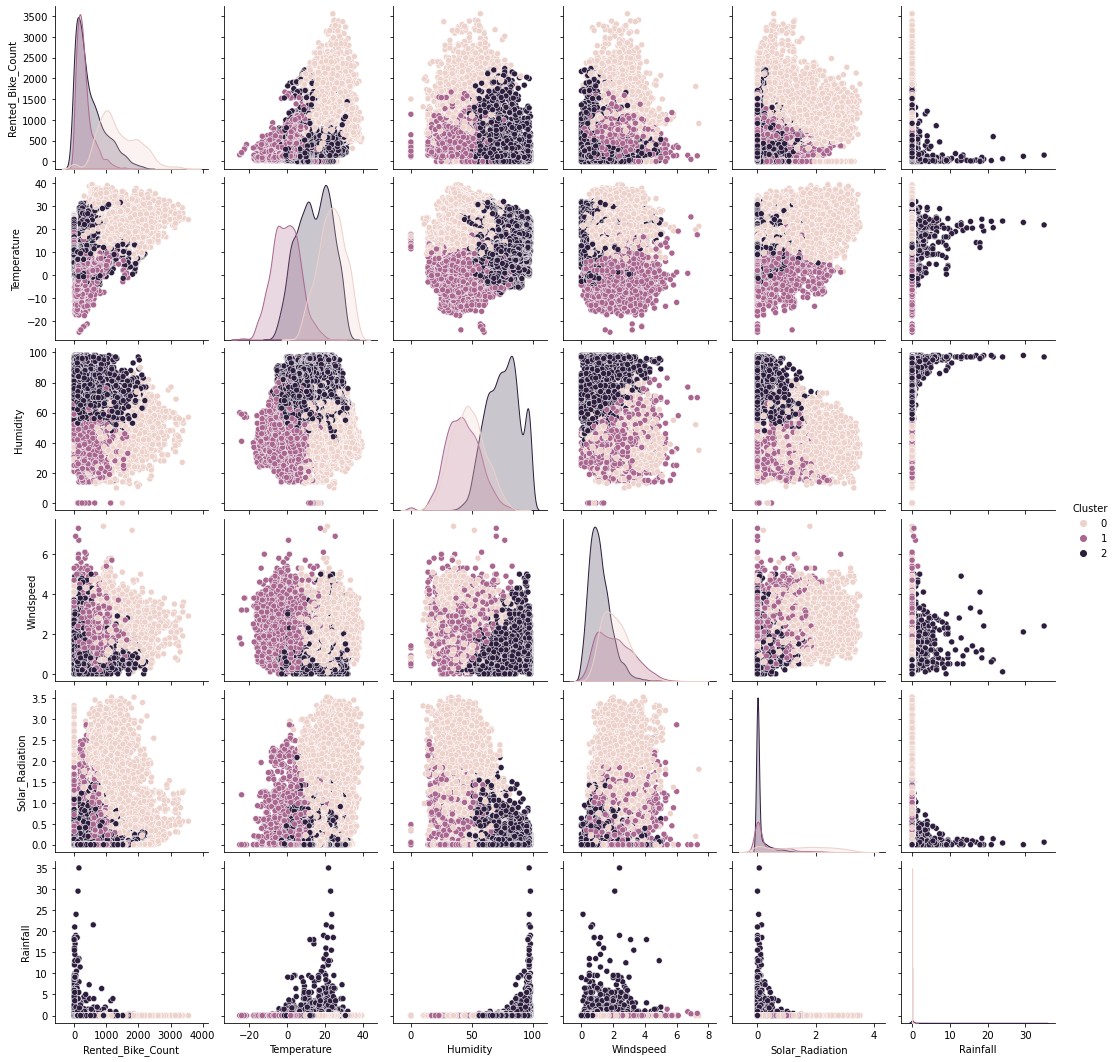

In [139]:
sns.pairplot(df_num[['Rented_Bike_Count', 'Temperature', 'Humidity', 'Windspeed', 'Solar_Radiation', 'Rainfall', 'Cluster']], hue='Cluster')
plt.show()

1. Cluster 0 are hit sales that has a moderate to large numbers of rented bike counts, occur within relatively high temperatures, humidity, windspeed, solar radiation and low rainfall.
2. It seemed that cluster 1 are hit sales with a moderate number of rented bike counts, with a scale of low to moderate temperatures, humidity and solar radiation and low rainfall.
3. Cluster 2 are hit sales with moderate temperature, high humidity, low windspeed and solar radiation, with abnormalities concerning the number of rented bike counts and the amount of rainfall with records of both them being low and high. Thus, an overlap.

In [140]:
from scipy.spatial.distance import cdist
#Try determining the best k for this dataset
distortions=[]
inertias=[]
K=range(2, 10) #DO NOT START FROM 1, K=1 means the data are grouped into ONE BIG CLUSTER??!!

for k in K:
    kmeansModel = KMeans(n_clusters=k).fit(scaled_df)
    kmeansModel.fit(scaled_df)
    
    distortions.append(sum(np.min(cdist(scaled_df, kmeansModel.cluster_centers_, 
                                       'euclidean'), axis=1)) / scaled_df.shape[0])
    inertias.append(kmeansModel.inertia_)

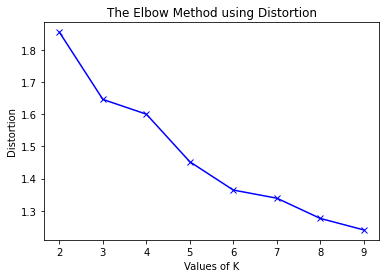

In [141]:
#Graph of Distortions Vs K
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

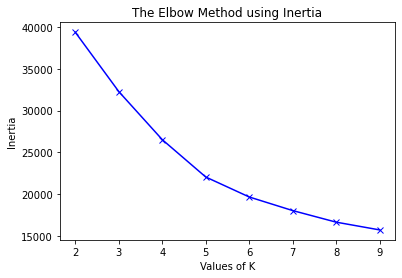

In [142]:
#Graph of Inertias Vs K
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

<hr style="border: 1px solid red;">

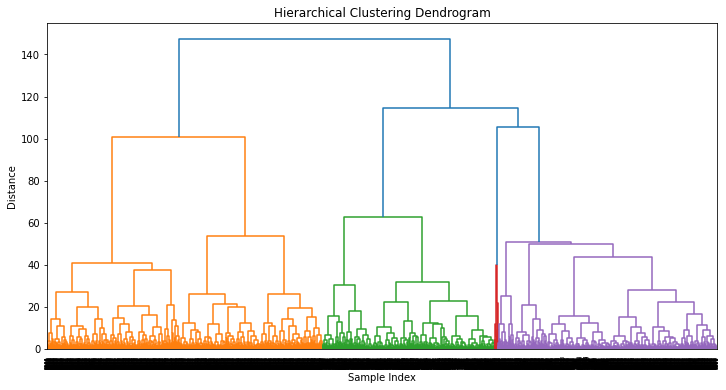

         Rented_Bike_Count  Temperature   Humidity  Windspeed  \
Cluster                                                         
1               977.148148    28.244444  69.407407   2.248148   
2              1016.240000    20.776000  63.560000   2.240000   
3              1502.300000    27.060000  58.700000   3.920000   
4               830.875000    32.325000  55.875000   3.612500   
5               953.705882    27.094118  71.823529   3.052941   
...                    ...          ...        ...        ...   
342             767.000000    15.164706  80.294118   1.747059   
343            1052.315789    28.000000  77.473684   1.294737   
344             923.800000    28.306667  73.300000   1.956667   
345            1010.809524    20.542857  82.785714   1.802381   
346             691.283019    20.635849  82.622642   1.235849   

         Solar_Radiation  Rainfall  
Cluster                             
1               1.097778  0.003704  
2               0.770400  0.004000  
3     

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#Selects features for clustering.
features = ['Rented_Bike_Count','Temperature','Humidity','Windspeed','Solar_Radiation', \
                                     'Rainfall']

#Scales the features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

#Chooses linkage method and distance metric.
linkage_method = 'ward'
distance_metric = 'euclidean'

#Performs hierarchical clustering.
Z = linkage(X_scaled, method=linkage_method, metric=distance_metric)

#Plots the dendrogram.
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

#Determines the number of clusters using the dendrogram.
max_d = 3  #Adjusts this threshold based on the dendrogram plot.
clusters = fcluster(Z, t=max_d, criterion='distance')

#Adds the cluster labels to the DataFrame.
df['Cluster'] = clusters

#Analyzes the clusters.
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

The extra clustering method that I have chosen to use is Hierarchical Clustering as the output is almost similar to k-means clustering, such as the number of clusters provided, and under specific conditions, the clusters can be quite similar to the clusters given by k-mean clustering.

<div class="alert alert-block alert-info">
<b>Remember to highlight in the report</b>
    
     - Why or why not you have adopted the suggestions provided by ChatGPT or other literatures
     - If adopted, indicate clearly where to find the supporting evidences or coding cells implementing them
     - Be specific in what tweak(s) is/are required to make the suggestions work or make predictive model(s) improve.
</div>

# <font color= maroon> Recommendations & Conclusion

Upon further inspection, the two recommendations I have come into conclusion is

<b>Tailored Marketing Strategies for Different Seasons</b>: While the initial hypothesis regarding Autumn as the best season for cycling was rejected, the analysis revealed that Summer sees the highest bike rental counts. Therefore, the company should strategically adjust its marketing efforts, focusing on promoting bike rentals during the peak Summer season. Specialized summer-themed campaigns, discounts, and offers can attract more customers during this period, capitalizing on the increased demand.

<b>Optimized Inventory Management and User Engagement</b>: The observation that evenings, especially around 6pm, experience the highest bike rental counts suggests a clear customer preference for this time slot. To capitalize on this trend, the company can strategically allocate more bikes to stations and ensure maintenance readiness during the evening hours. Additionally, personalized engagement strategies like timely notifications to users near these peak hours, informing them about bike availability, can enhance user experience and drive higher engagement.

# <font color= maroon> References

The content generated by AI tools are not retrievable except by the user who generated them, so they are considered non-recoverable sources. For non-recoverable sources:
- do not include in a reference list
- cite within the text as personal communications or correspondence

Based on APA 7th edition referencing format, we can adopt the format of (Communicator, personal communication, Month Day, year)
E.g. (Paraphrase from OpenAI's ChatGPT AI language model, personal communication, March 8, 2023).


Enter your list here.

3.3. metrics and scoring: Quantifying the quality of predictions. scikit. (n.d.). https://scikit-learn.org/stable/modules/model_evaluation.html 

Practical 5, 7 & 8

# <font color= maroon> Declaration on the use of Generative AI tools for assignments

Describe how you have used Generative AI tools such as ChatGPT or Dall.E-2 in your assignment. 
Show snapshots of the conversations with the AI tool (i.e., the prompts you used and the response you get from the AI tool). 

Drag and drop into the markdown cell(s) below.

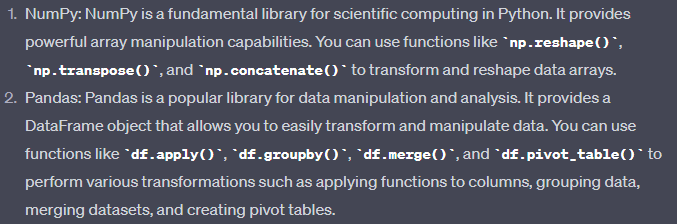

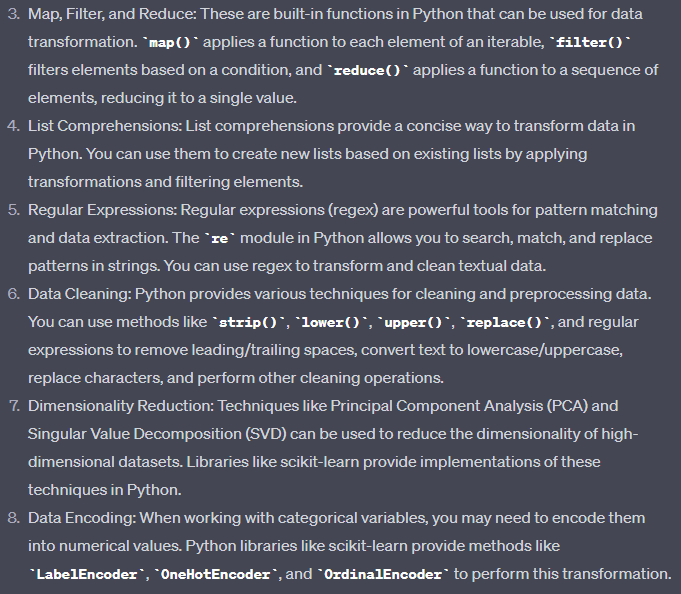

<div class="alert-success">
The suggestion I accepted was using the Data Transformation technique "Data Encodind", specifically, the method "OneHotEncoder". I used this method to One-Hot Encode my Season column in order to give the four different seasons equal importance as no season is more important than the other in this context.
</div>

<div class="alert-warning">
The suggestion I decided to research more on was NumPy and Pandas, because while I have already used them for data cleaning, I tried to see if they had more methods to offer for me to use for my data transformation, and in the end, I could not find any, or rather the methods I found did not suit my thoughts on the dataframe.
</div>

<div class="alert-danger">
From the suggestions, I rejected "Map, Filter and Reduce", "List Comprehensions", "Regular Expressions", "Data Cleaning" and "Dimensionality Reduction". This is because I have either already done those for data cleaning or they do not fit the project requirements in terms of techniques.
</div>

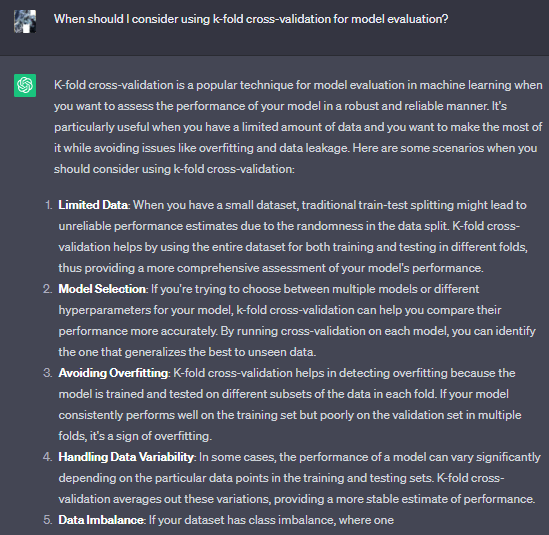

<div class="alert-success">
ChatGPT gave me tips and considerations regarding my clarificatiosn about a Linear Regression evaluation method I stumbled upon while researching.
</div>